# **Análisis y Predicción de la Conformidad de los Clientes de una Aerolínea**

In [1]:
#Importación de librerías propias de colab
import numpy as np
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn.metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import requests
import json


In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a218943eaed50c1022f39838bc63d9d50a2769919c080b184c209ddcd5cb0c99
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [ ]:
import pandas_profiling

<ipython-input-7-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
!pip install mlxtend

In [ ]:
#Reglas de Asociación
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=618c3a8dbb7a029fa38a67af29ed274dc91cdd7c541ba053ac34d6bbfc4ebeec
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
#Instalación de librerías extra
#! pip install datawig

In [ ]:
#Importación de librerías extra
#import datawig

## **Abstract**

El dataset escogido recopila información de una aerolínea obtenida mediante encuestas a sus pasajeros. El objetivo de la encuesta es saber si los usuarios han quedado satisfechos o no con su experiencia de vuelo. Este resultado es relevado mediante la variable categórica *'satisfaction'* cuyos valores son *'neutral or dissatisfied'* y *'satisfied'*. Entre las demás columnas se encuentran cuatro variables categóricas cuyos datos son del tipo *'object'*, que son: *'Gender'*, *'Customer Type'*, *'Type of Travel'* y *'Class'*. Muchas de las demás variables son también categóricas, pero se encuentran en formato numérico, indicando la graduación de la satisfacción respecto a la característica analizada. La clasificación en forma numérica de los grados de satisfacción permitirá analizar el grado de satisfacción prmedio de cada variable que, aunque no sea un valor propio de la variable, puede ser perfectamente interpretado. Además, como el rango de valores para la graduación es de 1 a 5, no hay valores atípicos ni se presentarán grandes casos de asimetrías.

Las columnas *'Age'*, *'Flight Distance'*, *'Departure Delay in Minutes'* y *'Arrival Delay in Minutes'* son puramente numéricas. El resto de las columnas abarca un gran abanico de aspectos a tener en cuenta en los vuelos, como los distintos servicios de abordo (wifi, comida, espacio) hasta la facilidad en el proceso de check in, ubicación de la zona de embarque y de elección de horario de viaje.

Con este dataset se pretende investigar qué características de los vuelos son aquellas que los pasajeros toman en mayor consideración a la hora de calificar su viaje. Se quiere, también, poder predecir el nivel de satisfacción de un cliente según las características de su viaje.

In [2]:
#Conexión al drive y levantamiento de datos

drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/Coder/Data_Science/Segunda_Entrega'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Coder/Data_Science/Segunda_Entrega


In [ ]:
df_AerolineasSatisfaccion = pd.read_csv('train.csv')
df_AerolineasSatisfaccion

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## Objetivo y Contexto Comercial
Se espera poder delimitar una región de decisión en la cual se pueda anticipar que el cliente se encontrará satisfecho. Teniendo delimitada dicha región, la empresa podrá analizar los costos dentro de la misma para identificar la modalidad de trabajo que genera los menores costos posibles, garantizando la satisfacción de los clientes.

Lograr este objetivo le permitirá a la aerolinea mantener un buen desempeño abaratando sus costos, mejorando, entonces, sus ganancias netas. Este objetivo comercial excede al presente trabajo puesto que no se disponen de los datos de los costos.

De incluirse también el valor de los pasajes como variable en el análisis se podría incluir el estudio del máximo valor posible para los pasajes que no generen insatisfacción en los usuarios. Sin embargo, este dato no está disponible, por lo que no se incluirá en el trabajo.

## **Hipótesis**
Al revisarse los datos, surgen las siguientes hipótesis:

*   La clase en la que vuelan los pasajeros es un factor de alta influencia en la calificación final de los usuarios.
*   La distancia a volar lleva a la elección de la clase del vuelo y, por lo tanto, impacta en la valoración del vuelo. (A menor distancia, se elige una clase más económica, por ende hay menor satisfacción).
*   La edad de los pasajeros influye en la elección de la clase del vuelo y termina afectando la satisfacción final. (A menor edad se eligen clases más económicas, por lo tanto mayor insatisfacción).
*   Las valoraciones promedio de los pasajeros satisfechos son mayores que las valoraciones promedio de aquellos que no han quedado satisfechos.
*   Las demoras en los tiempos de partida y llegada son un factor fundamental en la insatisfacción de los usuarios.


## EDA

Al levantar los datos del dataset *train.csv* se carga la tabla con las respuestas de los pasajeros a la encuesta de satisfacción. Se analizará la forma de la tabla, presencia de valores nulos, de atípicos, se estudiará la normalidad de las diferentes variables.

In [ ]:
df_AerolineasSatisfaccion.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Se encuentra la columna *Unnamed 0:* como duplicado del índice, que será eliminada.

In [ ]:
df_AerolineasSatisfaccion=df_AerolineasSatisfaccion.drop('Unnamed: 0', axis=1)

In [ ]:
df_AerolineasSatisfaccion

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Se analizan los tipos de datos que contiene cada columna:

In [ ]:
df_AerolineasSatisfaccion.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Se revisa el tamaño del dataset:

In [ ]:

df_AerolineasSatisfaccion.shape

(103904, 24)

Se analizan los datos de manera general:

In [ ]:
df_AerolineasSatisfaccion.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Con los datos ya presentados se pasa a la búsqueda de valores faltantes en las columnas. En este dataset sólo una columna presenta valores nulos que se deberán completar.

In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  display(df_AerolineasSatisfaccion.isna().sum())

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

En este dataset sólo figuran valores nulos en la columna correspondiente a las demoras en los arrivos. Esta columna tiene valores mínimos de 0, indicando que hay registros de vuelos donde no hubo demoras y el dato fue registrado correctamente. Para el trabajo con este dataset, los valores nulos deben ser modificados, y las opciones para hacerlo son: eliminar los 310 registros donde la demora no ha sido correctamente registrada, rellenar los datos con 0 bajo la asunción que estos datos han sido dejados vacíos por no haberse presentado demora o completar los datos con valores que no alteren drásticamente la distribuciónde la variable.

**Completando valores nulos**

In [ ]:
#Se completan los valores faltantes con la media. De instalarse datawig se usaría el imputador correspondiente.
df_AerolineasSatisfaccion=df_AerolineasSatisfaccion.fillna(df_AerolineasSatisfaccion['Arrival Delay in Minutes'].mean())

Con los valores nulos reemplazados se hace un nuevo análisis de los datos:

In [ ]:
df_AerolineasSatisfaccion.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Visualizaciones

Antes de transformar los datos a variables numéricas se hará un primer estudio de los mismos mediante gráficos. Se realiza esta etapa antes de los cambios para una mejor interpretación de las variables categóricas.

In [ ]:
df_Satisfaccion=df_AerolineasSatisfaccion.groupby('satisfaction')['id'].count()
df_Satisfaccion

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: id, dtype: int64

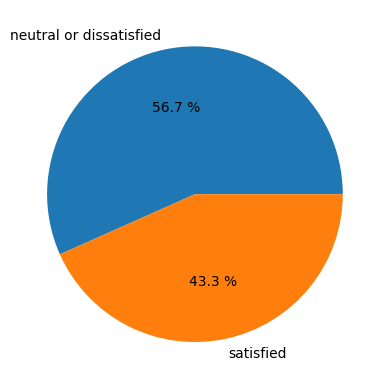

In [ ]:
plt.pie(df_Satisfaccion, labels=df_Satisfaccion.index, autopct="%0.1f %%")
plt.show()

El gráfico de torta indica que, aunque no por una gran diferencia, la mayoría de los usuarios presentan un nivel de satisfacción inferior al deseado.

In [ ]:
df_Genero=df_AerolineasSatisfaccion.groupby(['Gender','satisfaction'])['id'].count()
df_Genero

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
Name: id, dtype: int64

In [ ]:
df_Mujeres=df_Genero['Female']
df_Mujeres

satisfaction
neutral or dissatisfied    30193
satisfied                  22534
Name: id, dtype: int64

In [ ]:
df_Hombres=df_Genero['Male']
df_Hombres

satisfaction
neutral or dissatisfied    28686
satisfied                  22491
Name: id, dtype: int64

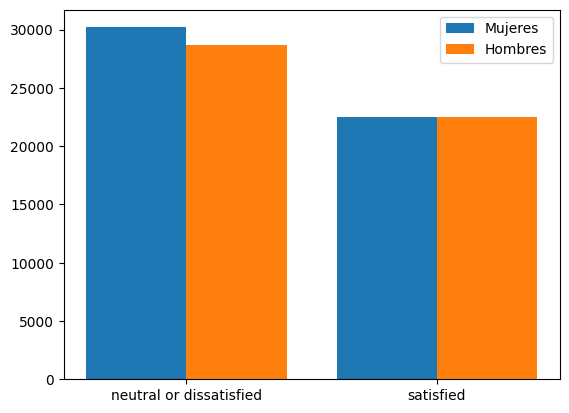

In [ ]:
n = 2
x = np.arange(n)
width = 0.4
plt.bar(x - width/2, df_Genero.Female, width=width, label='Mujeres')
plt.bar(x + width/2, df_Genero.Male, width=width, label='Hombres')
plt.xticks(x, df_Hombres.index)
plt.legend(loc='best')
plt.show()

El gráfico de barras muestra que la cantidad de personas satisfechas e insatisfechas es similar al dividir los datos entre hombres y mujeres. La cantidad de mujeres insatisfechas es ligeramente mayor a la cantidad de hombres en ese estado, pero no representa una cantidad significativa y se entiende como consecuencia de haber más mujeres encuestadas. A partir de lo arrojado por este gráfico pareciera ser que el género de las personas no es una variable influyente en la satisfacción en los vuelos.

In [ ]:
df_Edades=df_AerolineasSatisfaccion.groupby(['satisfaction','Age'])['id'].count()
df_Edades

satisfaction             Age
neutral or dissatisfied  7      506
                         8      571
                         9      597
                         10     593
                         11     569
                               ... 
satisfied                77      16
                         78      11
                         79      12
                         80      15
                         85       3
Name: id, Length: 150, dtype: int64

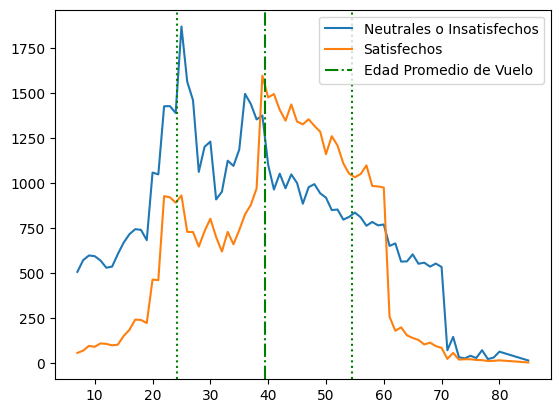

In [ ]:
dig, ax=plt.subplots()
plt.plot(df_Edades['neutral or dissatisfied'], label='Neutrales o Insatisfechos')
plt.plot(df_Edades['satisfied'], label='Satisfechos')
ax.axvline(df_AerolineasSatisfaccion['Age'].mean(), label='Edad Promedio de Vuelo', color='green', linestyle='-.')
ax.axvline(df_AerolineasSatisfaccion['Age'].mean()-df_AerolineasSatisfaccion['Age'].std(), color='green', linestyle=':')
ax.axvline(df_AerolineasSatisfaccion['Age'].mean()+df_AerolineasSatisfaccion['Age'].std(), color='green', linestyle=':')
plt.legend(loc='best')
plt.show()

El gráfico muestra que las edades que se encuentran menos satisfechas en los vuelos están entre los 20 y los 30, con otro pico antes de los 40 años. Mientras que las personas mayores de 40 se encuentran mayormente satisfechas. Se destaca que en torno a la media de edad de vuelo las valoraciones son similares, y se presentan disparidades en la satisfacción al alejarse de la media.
De observar este gráfico se puede concluir que ha de mejorarse la experiencia de vuelo para jóvenes menores entre 20 y 40 años, pues es la franja de edades (dentro de los valores esperados) donde los usuarios se muestran menos satisfechos.

<Axes: ylabel='Age'>

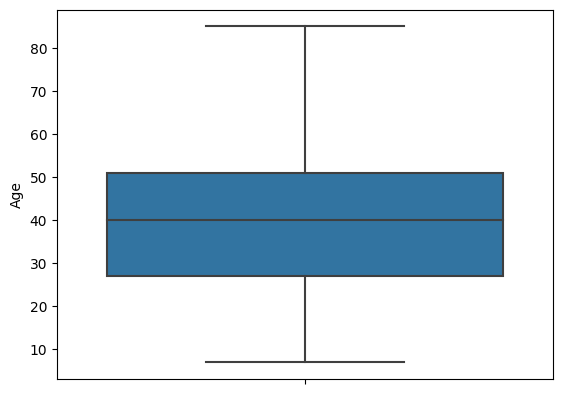

In [ ]:
sns.boxplot(y=df_AerolineasSatisfaccion['Age'], data=df_AerolineasSatisfaccion)

Este gráfico de caja indica los grupos etarios donde se concentra la mayor parte de los usuarios. Esto reafirma lo mencionado antes respecto a la importancia de mejorar la experiencia de vuelo para aquellos usuarios entre 20 y 40 años, pues conforman prácticamente todo el segundo cuartil de la muestra.

In [ ]:
df_Clase=df_AerolineasSatisfaccion.groupby(['Class', 'satisfaction'])['id'].count()
df_Clase

Class     satisfaction           
Business  neutral or dissatisfied    15185
          satisfied                  34480
Eco       neutral or dissatisfied    38044
          satisfied                   8701
Eco Plus  neutral or dissatisfied     5650
          satisfied                   1844
Name: id, dtype: int64

<Axes: xlabel='Flight Distance', ylabel='Proportion'>

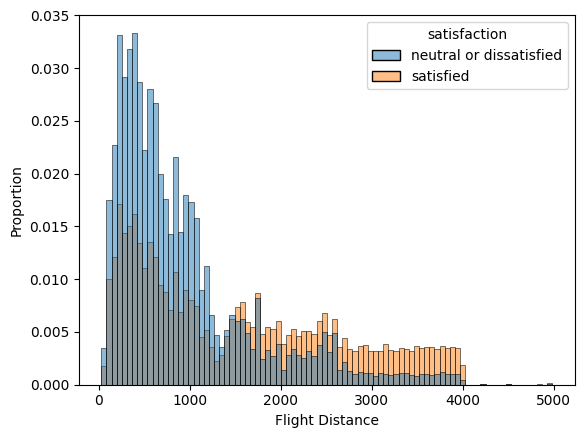

In [ ]:
sns.histplot(data=df_AerolineasSatisfaccion, x='Flight Distance', stat='proportion', hue='satisfaction')

En el histograma se puede ver que a mayor distancia de vuelo, mayor es el nivel de satisfacción. Esto hace surgir la hipótesis de que a mayores distancias los usuarios eligen otras opciones en sus vuelos (clase, servicios de wifi, entretenimiento, etc.) que mejoran la experiencia. Sin embargo es una llamada de atención que la gran mayoría de los usuarios hacen vuelos cortos y son éstos quienes presentan mayores disconformidades.

In [ ]:
df_Distancia_Clase=df_AerolineasSatisfaccion.groupby(['Class','Flight Distance'])['id'].count()
df_Distancia_Clase

Class     Flight Distance
Business  56                  3
          67                 29
          73                 11
          74                 10
          76                  1
                             ..
Eco Plus  3784                1
          3904                1
          4243                3
          4817                1
          4983                3
Name: id, Length: 6235, dtype: int64

<Axes: xlabel='Class', ylabel='Flight Distance'>

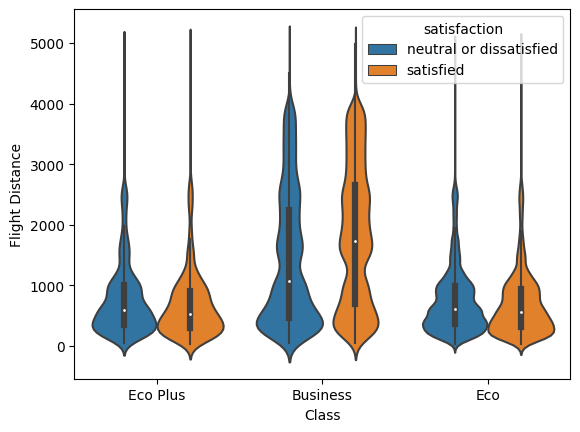

In [ ]:
sns.violinplot(x = df_AerolineasSatisfaccion['Class'], y=df_AerolineasSatisfaccion['Flight Distance'], hue=df_AerolineasSatisfaccion['satisfaction'])

En el gráfico de violín se puede apreciar como pareciese verificarse la hipótesis planteada acerca de la elección del vuelo dependiendo de la distancia. Se observa que los viajes de mayores distancias se concentran en la clase Business, en donde se ve una mayor satisfacción en los vuelos largos. Mientras que las clases Eco y Eco Plus se concentran en vuelos cortos.

### Abordaje y Conclusiones sobre las Hipótesis:

#### Hipótesis 1:

In [ ]:
df_satisfaccion_clase=df_AerolineasSatisfaccion.groupby(['Class', 'satisfaction'])['id'].count()
df_satisfaccion_clase

Class     satisfaction           
Business  neutral or dissatisfied    15185
          satisfied                  34480
Eco       neutral or dissatisfied    38044
          satisfied                   8701
Eco Plus  neutral or dissatisfied     5650
          satisfied                   1844
Name: id, dtype: int64

Text(0.5, 1.0, 'Relación Clase - Satisfacción')

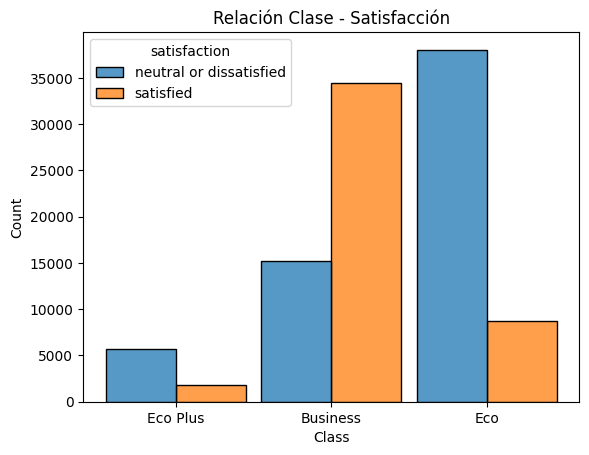

In [ ]:
sns.histplot(x = df_AerolineasSatisfaccion['Class'], hue=df_AerolineasSatisfaccion['satisfaction'], multiple='dodge', shrink=.9).set_title("Relación Clase - Satisfacción")

El conteo hecho mediante la agrupación por clases y nivel de satisfacción, junto con el histograma, muestran que la diferencia entre la cantidad de gente satisfecha e insatisfecha es muy marcada. La elección de la clase de vuelo parece impactar de manera muy directa en la experiencia de los usuarios, siendo que al elegir las clases Eco y Eco Plus la mayoría de los usuarios se muestran insatisfechos, mientras que al elegir Business la mayoría se muestra conforme con el viaje.

#### Hipótesis 2:

Text(0.5, 1.0, 'Relación Distancia - Satisfacción')

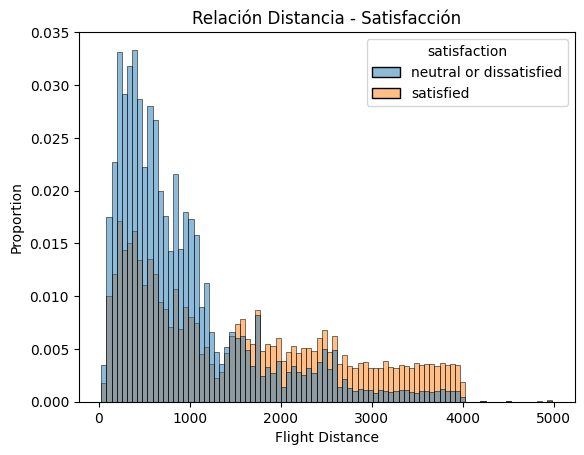

In [ ]:
sns.histplot(data=df_AerolineasSatisfaccion, x='Flight Distance', stat='proportion', hue='satisfaction').set_title("Relación Distancia - Satisfacción")

Text(0.5, 1.0, 'Relación Clase - Distancia - Satisfacción')

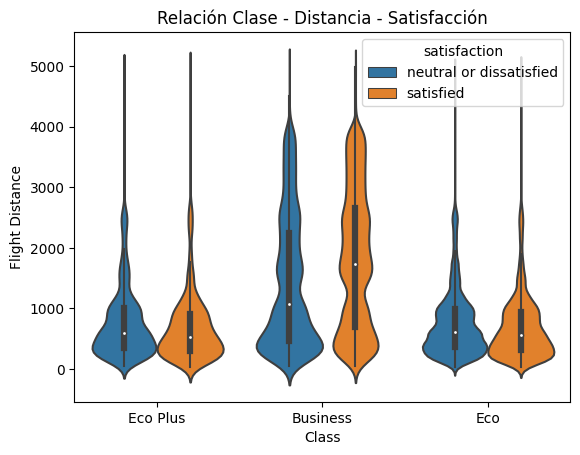

In [ ]:
sns.violinplot(x = df_AerolineasSatisfaccion['Class'], y=df_AerolineasSatisfaccion['Flight Distance'], hue=df_AerolineasSatisfaccion['satisfaction']).set_title("Relación Clase - Distancia - Satisfacción")

Text(0.5, 1.0, 'Relación Distancia - Clase')

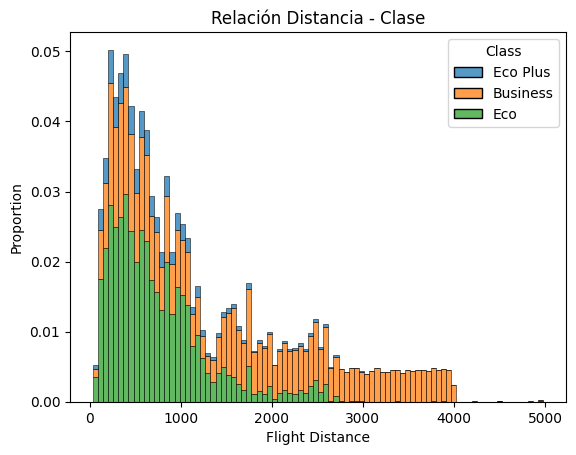

In [ ]:
sns.histplot(data=df_AerolineasSatisfaccion, x='Flight Distance', stat='proportion', hue='Class', multiple='stack').set_title("Relación Distancia - Clase")

In [ ]:
df_distancia_eco=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['Class']=='Eco',['id','Flight Distance', 'Class']]
df_distancia_ecoplus=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['Class']=='Eco Plus',['id','Flight Distance', 'Class']]
df_distancia_business=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['Class']=='Business',['id','Flight Distance', 'Class']]
df_distancia_business

,id,Flight Distance,Class
1,5047,235,Business
2,110028,1142,Business
3,24026,562,Business
4,119299,214,Business
7,96462,2035,Business
...,...,...,...
103894,86549,712,Business
103897,102203,1599,Business
103900,73097,2347,Business
103901,68825,1995,Business


In [ ]:
df_compilado_eco=df_distancia_eco.groupby('Flight Distance')['id'].count()
df_compilado_eco=pd.DataFrame(df_compilado_eco).reset_index()
df_compilado_eco=df_compilado_eco.rename(columns={'id':'Eco'})

df_compilado_ecoplus=df_distancia_ecoplus.groupby('Flight Distance')['id'].count()
df_compilado_ecoplus=pd.DataFrame(df_compilado_ecoplus).reset_index()
df_compilado_ecoplus=df_compilado_ecoplus.rename(columns={'id':'Eco Plus'})

df_compilado_business=df_distancia_business.groupby('Flight Distance')['id'].count()
df_compilado_business=pd.DataFrame(df_compilado_business).reset_index()
df_compilado_business=df_compilado_business.rename(columns={'id':'Business'})

df_distanciaxclase= pd.merge(pd.merge(df_compilado_eco,df_compilado_ecoplus,on='Flight Distance', how='outer'),df_compilado_business,on='Flight Distance', how='outer').fillna(0)
df_distanciaxclase

,Flight Distance,Eco,Eco Plus,Business
0,31,7.0,1.0,0.0
1,56,3.0,2.0,3.0
2,67,83.0,16.0,29.0
3,73,42.0,6.0,11.0
4,74,20.0,0.0,10.0
...,...,...,...,...
3797,3996,0.0,0.0,8.0
3798,3997,0.0,0.0,9.0
3799,3998,0.0,0.0,8.0
3800,3999,0.0,0.0,5.0


In [ ]:
print(df_distanciaxclase['Eco'].max())
print(df_distanciaxclase['Eco Plus'].max())
print(df_distanciaxclase['Business'].max())

372.0
54.0
234.0


In [ ]:
df_distanciaxclase[2*(df_distanciaxclase['Eco']+df_distanciaxclase['Eco Plus'])<df_distanciaxclase['Business'] ]

,Flight Distance,Eco,Eco Plus,Business
733,879,5.0,0.0,12.0
964,1130,3.0,1.0,9.0
1136,1337,17.0,1.0,39.0
1139,1340,4.0,1.0,11.0
1205,1426,13.0,0.0,30.0
...,...,...,...,...
3797,3996,0.0,0.0,8.0
3798,3997,0.0,0.0,9.0
3799,3998,0.0,0.0,8.0
3800,3999,0.0,0.0,5.0


Según se aprecia en el histograma, la mayoría de los pasajeros que han hecho vuelos cortos se han mostrado insatisfechos en las encuestas. El gráfico de violín muestra como los vuelos de mayor distancia son en su mayoría en clase Business, donde el grado de satisfacción es mayor. El segundo histograma permite apreciar con mayor claridad la proporción de los viajes en clases económicas contra las clases ejecutivas a medida que aumenta la distancia, ubicando al punto de cambio en 1337 (en las distancias de 879 y 1130 también hay mayoría de clase Business, pero la diferencia es nominalmente baja).

#### Hipótesis 3:

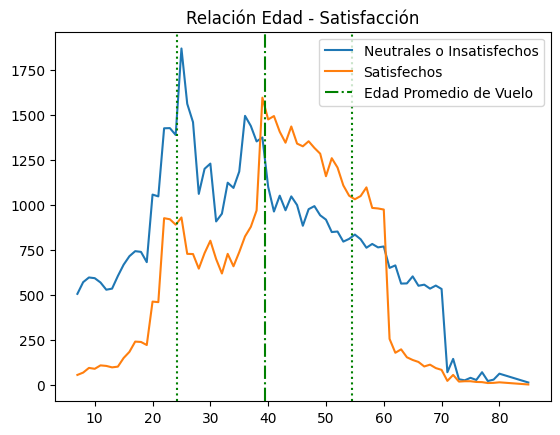

In [ ]:
dig, ax=plt.subplots()
plt.plot(df_Edades['neutral or dissatisfied'], label='Neutrales o Insatisfechos')
plt.plot(df_Edades['satisfied'], label='Satisfechos')
ax.axvline(df_AerolineasSatisfaccion['Age'].mean(), label='Edad Promedio de Vuelo', color='green', linestyle='-.')
ax.axvline(df_AerolineasSatisfaccion['Age'].mean()-df_AerolineasSatisfaccion['Age'].std(), color='green', linestyle=':')
ax.axvline(df_AerolineasSatisfaccion['Age'].mean()+df_AerolineasSatisfaccion['Age'].std(), color='green', linestyle=':')
plt.legend(loc='best')
plt.title("Relación Edad - Satisfacción")
plt.show()

Text(0.5, 1.0, 'Relación Edad - Clase')

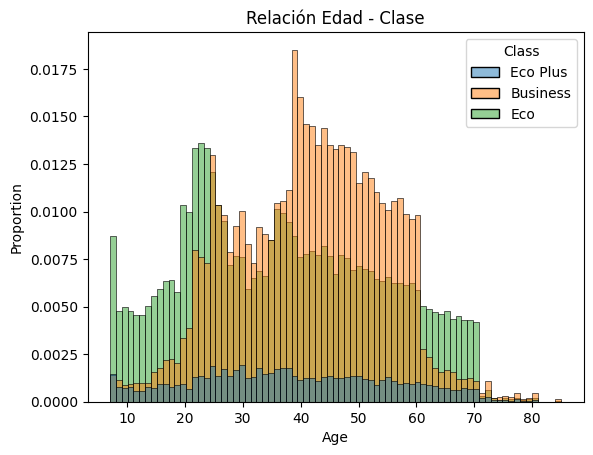

In [ ]:
sns.histplot(data=df_AerolineasSatisfaccion, x='Age', stat='proportion', hue='Class').set_title("Relación Edad - Clase")

In [ ]:
df_tipo_viaje20_40=df_AerolineasSatisfaccion[np.abs(df_AerolineasSatisfaccion['Age']-30)<10][['id','Age','Type of Travel','Class','satisfaction']]
df_tipo_viaje20_40

,id,Age,Type of Travel,Class,satisfaction
1,5047,25,Business travel,Business,neutral or dissatisfied
2,110028,26,Business travel,Business,satisfied
3,24026,25,Business travel,Business,neutral or dissatisfied
5,111157,26,Personal Travel,Eco,neutral or dissatisfied
10,34991,24,Business travel,Eco,neutral or dissatisfied
...,...,...,...,...,...
103895,66030,24,Business travel,Eco,neutral or dissatisfied
103899,94171,23,Business travel,Eco,neutral or dissatisfied
103901,68825,30,Business travel,Business,neutral or dissatisfied
103902,54173,22,Business travel,Eco,neutral or dissatisfied


In [ ]:
df_tipo_agrupado=df_tipo_viaje20_40.groupby(['Type of Travel','satisfaction'])['id'].count()
df_tipo_agrupado

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    15988
                 satisfied                  14497
Personal Travel  neutral or dissatisfied     8595
                 satisfied                    973
Name: id, dtype: int64

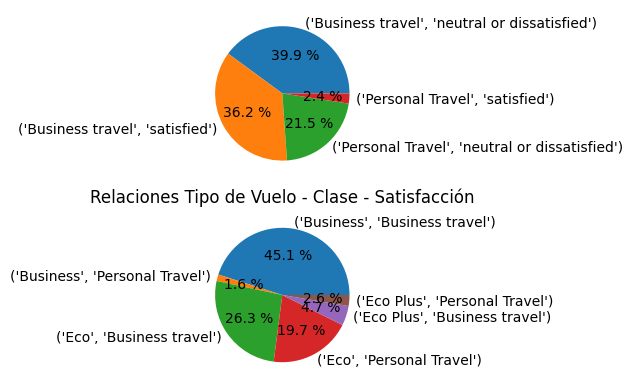

In [ ]:
fig, axs=plt.subplots(nrows=2,ncols=1)
axs[0].pie(df_tipo_agrupado, labels=df_tipo_agrupado.index, autopct="%0.1f %%")
axs[1].pie(df_tipo_viaje20_40.groupby(['Class','Type of Travel'])['id'].count(),labels=df_tipo_viaje20_40.groupby(['Class','Type of Travel'])['id'].count().index, autopct="%0.1f %%")
plt.title("Relaciones Tipo de Vuelo - Clase - Satisfacción")
plt.show()

El lineplot y el histograma referentes a las edades, satisfacción y clases de los usuarios muestran como las franjas etarias en que los usuarios se muestran insatisfechos coinciden mayormente con las franjas etarias donde los usuarios optan por viajar en clase Business. Se percibe una diferencia entre los 25 y 40 años. En esta franja el 61.4% de los usuarios se ha mostrado disconforme y la diferencia pareciera estar en aquellos usuarios que hacen viajes personales (hay una diferencia de casi el 20% a favor de los insatisfechos, comparados con una diferencia del 3% entre la satisfacción e insatisfacción en vuelos de trabajo).

#### Hipótesis 4:

In [ ]:
df_numericas=pd.concat([df_AerolineasSatisfaccion.select_dtypes(['int64','float']),df_AerolineasSatisfaccion['satisfaction']],axis=1)
df_categoricas=df_AerolineasSatisfaccion.select_dtypes('object')
df_numericas

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df_columnas_valoraciones=df_numericas.drop(['id','Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)
df_columnas_valoraciones

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,neutral or dissatisfied
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,satisfied
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,neutral or dissatisfied
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,neutral or dissatisfied


In [ ]:
df_columnas_valoraciones_promedio=df_columnas_valoraciones.groupby('satisfaction').mean().reset_index()
df_columnas_valoraciones_promedio

,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,neutral or dissatisfied,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123
1,satisfied,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342


Text(0.5, 0.98, 'Relación Satisfacciones Promedio - Satisfacción')

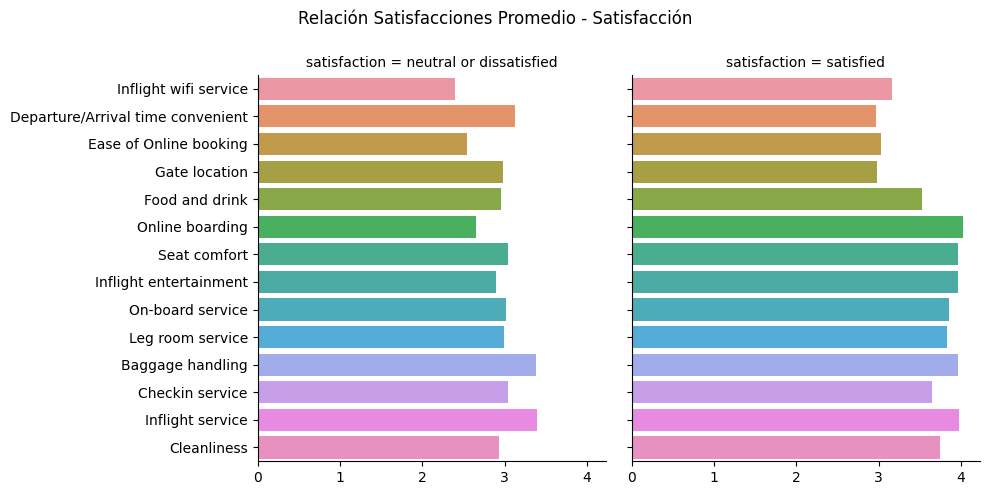

In [ ]:
fig_meansat=sns.catplot(data=df_columnas_valoraciones_promedio, col='satisfaction', kind='bar', orient='h')
fig_meansat.fig.subplots_adjust(top=0.85)
fig_meansat.fig.suptitle("Relación Satisfacciones Promedio - Satisfacción")

La tabla y el gráfico anterior muestran que los valores promedios de las valoraciones es marcadamente superior en los vuelos que fueron satisfactorios. Las únicas excepciones son el servicio de wifi, la partida/arrivo en tiempo adecuado, la reserva online y la ubicación de la puerta de embarque. En estos cuatro aspectos la diferencia es poco significativa, incluso siendo mayor el promedio de la satisfacción respecto a los tiempos de partida y llegada en aquellos usuarios que no quedaron tan satisfechos con el viaje.

#### Hipótesis 5:

In [ ]:
df_promedios=df_AerolineasSatisfaccion[df_AerolineasSatisfaccion.columns[7:21]]
df_AerolineasSatisfaccion['Mean Satisfaction']=df_AerolineasSatisfaccion[df_AerolineasSatisfaccion.columns[7:21]].mean(axis=1)
df_AerolineasSatisfaccion=df_AerolineasSatisfaccion[['id','Gender','Customer Type',	'Age','Type of Travel','Class',	'Flight Distance',	'Inflight wifi service',	'Departure/Arrival time convenient',	'Ease of Online booking',	'Gate location',	'Food and drink',	'Online boarding',	'Seat comfort',	'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness',	'Departure Delay in Minutes',	'Arrival Delay in Minutes', 'Mean Satisfaction',	'satisfaction']]
df_AerolineasSatisfaccion

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Mean Satisfaction,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,3.857143,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,2.285714,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,3.714286,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,3.000000,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,3.500000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,1,4,2,3,2,3,0.0,2.214286,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,4,0,0.0,4.357143,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,3,2,4,5,5,4,7,14.0,3.071429,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,5,1,5,4,1,0,0.0,2.285714,neutral or dissatisfied


In [ ]:
df_AerolineasSatisfaccion['Arrival Delay in Minutes'].max()

1584.0

Text(0.5, 1.0, 'Relación Demora de Partida - Satisfacción')

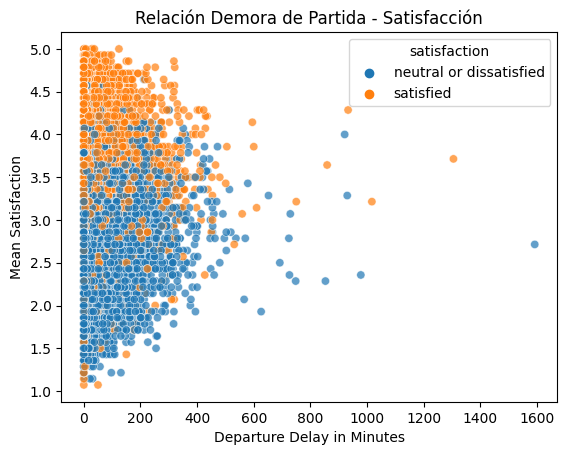

In [ ]:
sns.scatterplot(data=df_AerolineasSatisfaccion, x='Departure Delay in Minutes', y='Mean Satisfaction', hue='satisfaction', alpha=0.7).set_title("Relación Demora de Partida - Satisfacción")

Text(0.5, 1.0, 'Relación Demora de Llegada - Satisfacción')

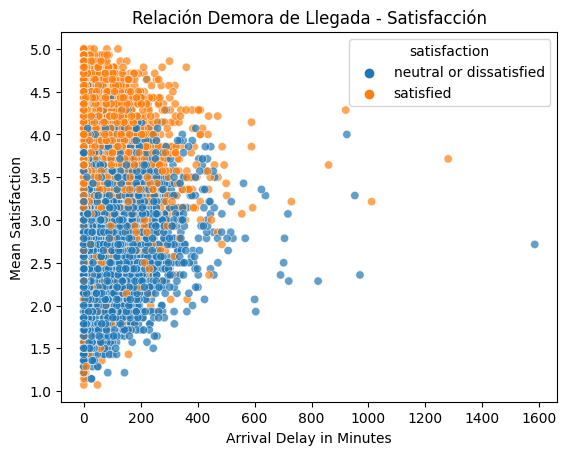

In [ ]:
sns.scatterplot(data=df_AerolineasSatisfaccion, x='Arrival Delay in Minutes', y='Mean Satisfaction', hue='satisfaction', alpha=0.7).set_title("Relación Demora de Llegada - Satisfacción")

Ambos gráficos de dispersión muestran como al aumentar las demoras, baja la satisfacción. Para una visualización más precisa, se dividirán los rangos de la satisfacción promedio en mayores y menores a su promedio, y se reducirá el tiempo de demora a tiempos menores a 500 minutos ya que es donde se encuentran concentrados la mayoría de los datos. La franja de tiempos de demoras mayores a 500 minutos será descartada, habiendo visto previamente que la mayoría de los datos correspondientes a estos valores muestran mayoría de usuarios insatisfechos.

Text(0.5, 1.0, 'Relación Demora de Partida - Satisfacción (SUP)')

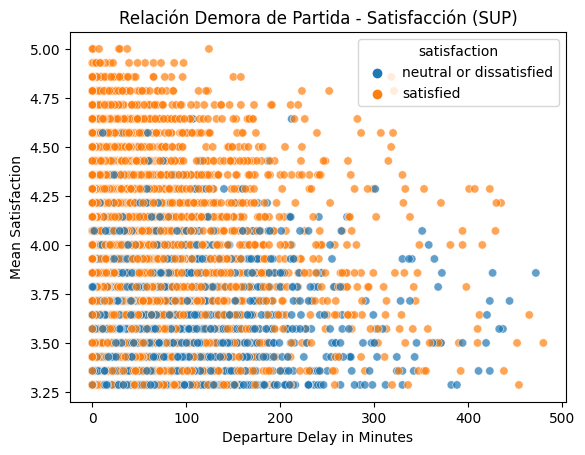

In [ ]:
sns.scatterplot(data=df_AerolineasSatisfaccion[(df_AerolineasSatisfaccion['Mean Satisfaction']>df_AerolineasSatisfaccion['Mean Satisfaction'].mean())&(df_AerolineasSatisfaccion['Departure Delay in Minutes']<500)], x='Departure Delay in Minutes', y='Mean Satisfaction', hue='satisfaction', alpha=0.7).set_title("Relación Demora de Partida - Satisfacción (SUP)")

Text(0.5, 1.0, 'Relación Demora de Partida - Satisfacción (INF)')

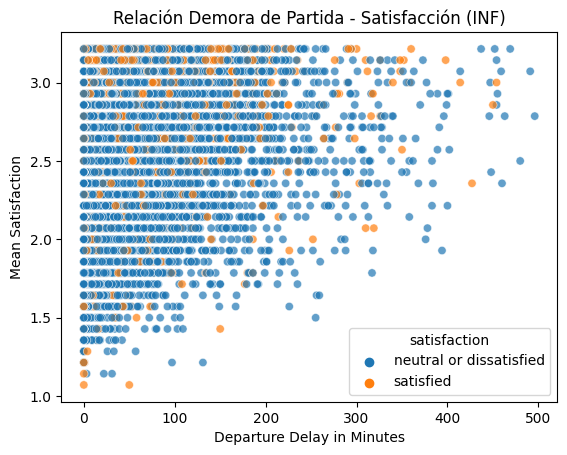

In [ ]:
sns.scatterplot(data=df_AerolineasSatisfaccion[(df_AerolineasSatisfaccion['Mean Satisfaction']<df_AerolineasSatisfaccion['Mean Satisfaction'].mean())&(df_AerolineasSatisfaccion['Departure Delay in Minutes']<500)], x='Departure Delay in Minutes', y='Mean Satisfaction', hue='satisfaction', alpha=0.7).set_title("Relación Demora de Partida - Satisfacción (INF)")

Text(0.5, 1.0, 'Relación Demora de Llegada - Satisfacción (SUP)')

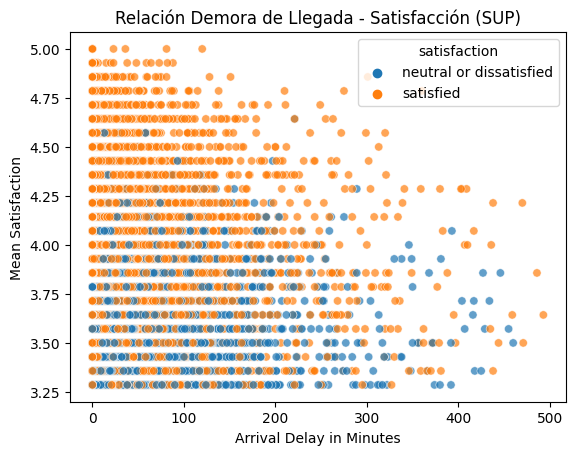

In [ ]:
sns.scatterplot(data=df_AerolineasSatisfaccion[(df_AerolineasSatisfaccion['Mean Satisfaction']>df_AerolineasSatisfaccion['Mean Satisfaction'].mean())&(df_AerolineasSatisfaccion['Arrival Delay in Minutes']<500)], x='Arrival Delay in Minutes', y='Mean Satisfaction', hue='satisfaction', alpha=0.7).set_title("Relación Demora de Llegada - Satisfacción (SUP)")

Text(0.5, 1.0, 'Relación Demora de Llegada - Satisfacción (INF)')

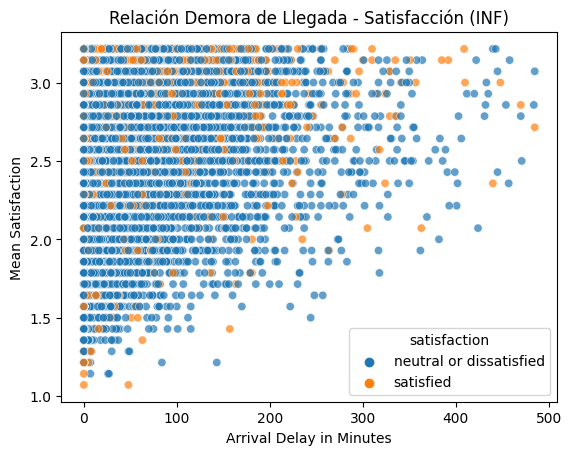

In [ ]:
sns.scatterplot(data=df_AerolineasSatisfaccion[(df_AerolineasSatisfaccion['Mean Satisfaction']<df_AerolineasSatisfaccion['Mean Satisfaction'].mean())&(df_AerolineasSatisfaccion['Arrival Delay in Minutes']<500)], x='Arrival Delay in Minutes', y='Mean Satisfaction', hue='satisfaction', alpha=0.7).set_title("Relación Demora de Llegada - Satisfacción (INF)")

En los últimos cuatro gráficos de dispersión se puede apreciar que aquellos usuarios cuya valoración promedio fue menor a la media se han mostrado disconformes con sus vuelos, sin importar realmente la demora. En los casos que se registran valoraciones promedio mayores a la media se puede apreciar que, al aumentar los tiempos de demoras, bajan las valoraciones promedio y baja la cantidad de usuarios satisfechos. El hecho que haya usuarios que, habiendo dado una alta valoración promedio, se mostraran neutrales o insatisfechos respecto a sus vuelos al tener demoras indica que éstas son un factor importante en la decisión final.

Ya habiendo hecho las visualizaciones de los datos, se convertirán las variables categóricas a numéricas para la implementación del modelo de *Machine Learning*.

In [ ]:
df_AerolineasSatisfaccion.replace({'Male': 1, 'Female': 0}, inplace= True)
df_AerolineasSatisfaccion.replace({'Loyal Customer': 1, 'disloyal Customer': 0}, inplace= True)
df_AerolineasSatisfaccion.replace({'Business travel': 1, 'Personal Travel': 0}, inplace= True)
df_AerolineasSatisfaccion.replace({'Business': 2, 'Eco Plus': 1, 'Eco':0}, inplace= True)
df_AerolineasSatisfaccion.replace({'satisfied': 0, 'neutral or dissatisfied': 1}, inplace= True)
df_AerolineasSatisfaccion

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Mean Satisfaction,satisfaction
0,70172,1,1,13,0,1,460,3,4,3,...,4,3,4,4,5,5,25,18.0,3.857143,1
1,5047,1,0,25,1,2,235,3,2,3,...,1,5,3,1,4,1,1,6.0,2.285714,1
2,110028,0,1,26,1,2,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,3.714286,0
3,24026,0,1,25,1,2,562,2,5,5,...,2,5,3,1,4,2,11,9.0,3.000000,1
4,119299,1,1,61,1,2,214,3,3,3,...,3,4,4,3,3,3,0,0.0,3.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,0,0,23,1,0,192,2,1,2,...,3,1,4,2,3,2,3,0.0,2.214286,1
103900,73097,1,1,49,1,2,2347,4,4,4,...,5,5,5,5,5,4,0,0.0,4.357143,0
103901,68825,1,0,30,1,2,1995,1,1,1,...,3,2,4,5,5,4,7,14.0,3.071429,1
103902,54173,0,0,22,1,0,1000,1,1,1,...,4,5,1,5,4,1,0,0.0,2.285714,1


### Normalidad

Ya visualizados los datos y planteadas las hipótesis, se analizará la normalidad de las variables del modelo.

In [ ]:
for i in df_AerolineasSatisfaccion.columns:
  print(i)
  print('Curtosis:', stats.kurtosis(df_AerolineasSatisfaccion[i]))
  print('Asimetría:', stats.skew(df_AerolineasSatisfaccion[i]))

id
Curtosis: -1.1984401708449242
Asimetría: 0.002864206903791913
Gender
Curtosis: -1.9991096607684524
Asimetría: 0.029838552772329052
Customer Type
Curtosis: 0.6976140392591335
Asimetría: -1.6424414873167117
Age
Curtosis: -0.7195912358853982
Asimetría: -0.004516061875455768
Type of Travel
Curtosis: -1.328011325868215
Asimetría: -0.8197491531753996
Class
Curtosis: -1.9189945368292285
Asimetría: -0.05610349168416988
Flight Distance
Curtosis: 0.2684647723539233
Asimetría: 1.1094496509044767
Inflight wifi service
Curtosis: -0.846186745661841
Asimetría: 0.04040743822796157
Departure/Arrival time convenient
Curtosis: -1.0377750909338364
Asimetría: -0.334393804647934
Ease of Online booking
Curtosis: -0.9103601470383791
Asimetría: -0.018294009233805444
Gate location
Curtosis: -1.0302914664224148
Asimetría: -0.05888856142642904
Food and drink
Curtosis: -1.145455830074031
Asimetría: -0.1512773130511732
Online boarding
Curtosis: -0.7020297683197172
Asimetría: -0.4538451433328787
Seat comfort
Curt

Entendiendo que muchas variables son categóricas, se hace el análisis específico de aquellas cuyas distribuciones son continuas:

In [ ]:
for i in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Mean Satisfaction']:
  print(i)
  print('Curtosis:', stats.kurtosis(df_AerolineasSatisfaccion[i]))
  print('Asimetría:', stats.skew(df_AerolineasSatisfaccion[i]))

Age
Curtosis: -0.7195912358853982
Asimetría: -0.004516061875455768
Flight Distance
Curtosis: 0.2684647723539233
Asimetría: 1.1094496509044767
Departure Delay in Minutes
Curtosis: 100.26212311878137
Asimetría: 6.733882295382029
Arrival Delay in Minutes
Curtosis: 94.82424569749837
Asimetría: 6.606403831894603
Mean Satisfaction
Curtosis: -0.48012364911517746
Asimetría: -0.06780135836703442


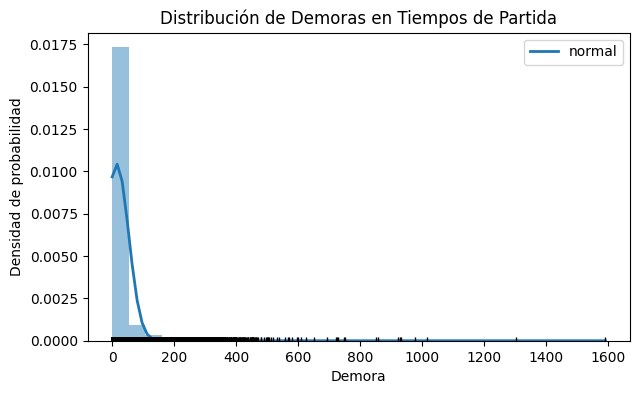

In [ ]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(df_AerolineasSatisfaccion['Departure Delay in Minutes'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df_AerolineasSatisfaccion['Departure Delay in Minutes']), max(df_AerolineasSatisfaccion['Departure Delay in Minutes']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df_AerolineasSatisfaccion['Departure Delay in Minutes'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(df_AerolineasSatisfaccion['Departure Delay in Minutes'], np.full_like(df_AerolineasSatisfaccion['Departure Delay in Minutes'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de Demoras en Tiempos de Partida')
ax.set_xlabel('Demora')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

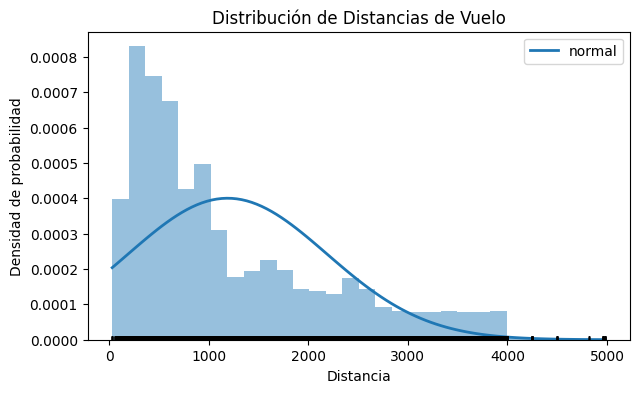

In [ ]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(df_AerolineasSatisfaccion['Flight Distance'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df_AerolineasSatisfaccion['Flight Distance']), max(df_AerolineasSatisfaccion['Flight Distance']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df_AerolineasSatisfaccion['Flight Distance'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(df_AerolineasSatisfaccion['Flight Distance'], np.full_like(df_AerolineasSatisfaccion['Flight Distance'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de Distancias de Vuelo')
ax.set_xlabel('Distancia')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

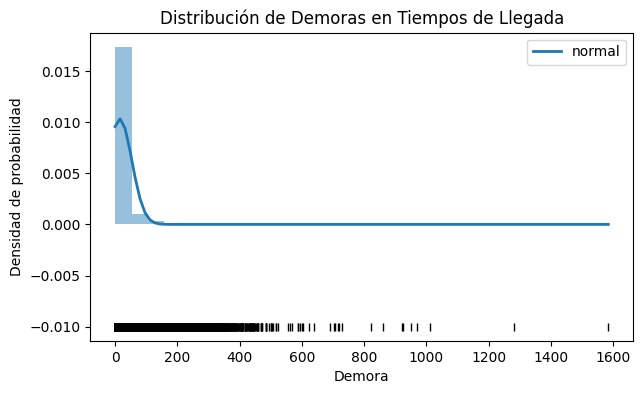

In [ ]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(df_AerolineasSatisfaccion['Arrival Delay in Minutes'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df_AerolineasSatisfaccion['Arrival Delay in Minutes']), max(df_AerolineasSatisfaccion['Arrival Delay in Minutes']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df_AerolineasSatisfaccion['Arrival Delay in Minutes'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(df_AerolineasSatisfaccion['Arrival Delay in Minutes'], np.full_like(df_AerolineasSatisfaccion['Arrival Delay in Minutes'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de Demoras en Tiempos de Llegada')
ax.set_xlabel('Demora')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## Observaciones sobre los datos
Muchas columnas corresponden a variables categóricas, por lo que se hizo un cambio en las variables para pasarlas a formato numérico. Luego se rellenaron los datos faltantes de una columna, en un dataframe auxiliar, con su media correspondiente. Se analizó, después, la curtosis y la asimetría para analizar normalidad en las variables. Siendo que muchas variables son categóricas, traducidas a formato numérico, no es de extrañar que algunas de ellas no tengan distribución normal. Sin embargo, algunas variables que sí son numéricas presentan desvíos respecto a la distribución normal. Se incluyen los histogramas, junto con las curvas normales correspondientes, de dichas variables. Se deberá hacer un trabajo extra con estas columnas para lidiar con el problema de la no normalidad.

## Feature Selection
Como se asume que los clientes satisfechos no presentarán quejas y, posiblemente, elegirán volver a volar con la aerolínea o incluso hacer buenas reseñas, se decide hacer foco en aquellos clientes que se han mostrado insatisfechos. Detectar estos casos puede ayudar a la aerolínea a mejorar su servicio, evitando que los pasajeros dejen de sacar su vuelos en ella y evitar la mala publicidad.

Por otro lado, los casos detectados como falsos positivos pueden ocasionar problemas a la empresa, pues son clientes con los que se especulan buenos resultados, que se traducen en nuevos vuelos y mayores ingresos, pero finalmente nada de eso se cumple, lo que puede ser un problema en los márgenes de costos estipulados.

Los falsos negativos, en cambio, producen, potencialmente, ingresos extra, fuera de lo contemplado, por lo que no son un aspecto perjudicial para la aerolínea.
Teniendo esto en cuenta, la métrica que se utilizará en este modelo será de **$Especificidad=\frac{TN}{TN+FP}$**.

(Como las métricas que se listan abajo no incluyen la *especificidad*, se le asignará el valor 1 a los clientes insatisfechos y 0 a los satisfechos para aplicar la métrica de sensibilidad con los valores positivos y negativos invertidos)

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
X=df_AerolineasSatisfaccion.drop(['id','satisfaction'], axis=1)
Y=df_AerolineasSatisfaccion['satisfaction']


In [ ]:
X.shape

(103904, 23)

Al iniciar el proceso de feature selection se puede ver que el dataset cuenta con 23 variables predictoras.

### Stepwise Selection

In [ ]:
sfs_stepwise=SFS(DecisionTreeClassifier(), k_features=(7,15),forward= True, floating= True, scoring='recall', cv= 0)
sfs_stepwise.fit(X,Y)
mejores_variables_stepwise=pd.Series(sfs_stepwise.k_feature_names_)
mejores_variables_stepwise=mejores_variables_stepwise.tolist()
mejores_variables_stepwise

['Gender',
 'Customer Type',
 'Age',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Gate location',
 'Departure Delay in Minutes',
 'Mean Satisfaction']

La selección hecha por el método bidireccional arroja una lista de 9 variables para este modelo.

In [ ]:
best_X_stepwise=df_AerolineasSatisfaccion[mejores_variables_stepwise]
best_X_stepwise

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Gate location,Departure Delay in Minutes,Mean Satisfaction
0,1,1,13,1,460,3,1,25,3.857143
1,1,0,25,2,235,3,3,1,2.285714
2,0,1,26,2,1142,2,2,0,3.714286
3,0,1,25,2,562,2,5,11,3.000000
4,1,1,61,2,214,3,3,0,3.500000
...,...,...,...,...,...,...,...,...,...
103899,0,0,23,0,192,2,3,3,2.214286
103900,1,1,49,2,2347,4,4,0,4.357143
103901,1,0,30,2,1995,1,3,7,3.071429
103902,0,0,22,0,1000,1,5,0,2.285714


### Forward Selection

In [ ]:
sfs_forward=SFS(DecisionTreeClassifier(), k_features=(7,15),forward= True, floating= False, scoring='recall', cv= 0)
sfs_forward.fit(X,Y)
mejores_variables_forward=pd.Series(sfs_forward.k_feature_names_)
mejores_variables_forward=mejores_variables_forward.tolist()
mejores_variables_forward

['Gender',
 'Customer Type',
 'Age',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Gate location',
 'Departure Delay in Minutes',
 'Mean Satisfaction']

In [ ]:
best_X_forward=df_AerolineasSatisfaccion[mejores_variables_forward]
best_X_forward

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Gate location,Departure Delay in Minutes,Mean Satisfaction
0,1,1,13,1,460,3,1,25,3.857143
1,1,0,25,2,235,3,3,1,2.285714
2,0,1,26,2,1142,2,2,0,3.714286
3,0,1,25,2,562,2,5,11,3.000000
4,1,1,61,2,214,3,3,0,3.500000
...,...,...,...,...,...,...,...,...,...
103899,0,0,23,0,192,2,3,3,2.214286
103900,1,1,49,2,2347,4,4,0,4.357143
103901,1,0,30,2,1995,1,3,7,3.071429
103902,0,0,22,0,1000,1,5,0,2.285714


### Backward Selection

In [ ]:
sfs_backward=SFS(DecisionTreeClassifier(), k_features=(7,15),forward= False, floating= False, scoring='recall', cv= 0)
sfs_backward.fit(X,Y)
mejores_variables_backward=pd.Series(sfs_backward.k_feature_names_)
mejores_variables_backward=mejores_variables_backward.tolist()
mejores_variables_backward

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'On-board service',
 'Leg room service']

In [ ]:
best_X_backward=df_AerolineasSatisfaccion[mejores_variables_backward]
best_X_backward

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service
0,1,1,13,0,1,460,3,4,3,1,5,3,5,4,3
1,1,0,25,1,2,235,3,2,3,3,1,3,1,1,5
2,0,1,26,1,2,1142,2,2,2,2,5,5,5,4,3
3,0,1,25,1,2,562,2,5,5,5,2,2,2,2,5
4,1,1,61,1,2,214,3,3,3,3,4,5,5,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,23,1,0,192,2,1,2,3,2,2,2,3,1
103900,1,1,49,1,2,2347,4,4,4,4,2,4,5,5,5
103901,1,0,30,1,2,1995,1,1,1,3,4,1,5,3,2
103902,0,0,22,1,0,1000,1,1,1,5,1,1,1,4,5


### Mixed Selection
Crearé a continuación una lista de variables tomando sólo aquellas que estén presente en las tres listas confeccionadas con los métodos anteriores.

In [ ]:
print(mejores_variables_stepwise)
print(mejores_variables_forward)
print(mejores_variables_backward)

['Gender', 'Customer Type', 'Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Gate location', 'Departure Delay in Minutes', 'Mean Satisfaction']
['Gender', 'Customer Type', 'Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Gate location', 'Departure Delay in Minutes', 'Mean Satisfaction']
['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'On-board service', 'Leg room service']


Al comparar las tres listas obtenidas se puede apreciar que los algoritmos de forward y stepwise selection arrojan la misma selección de variables. Sin embargo, ambas listas presentan diferencias en comparación con la lista generada por el algoritmo de backward selection.

In [ ]:
mejores_variables_mix=[]
for i in mejores_variables_forward:
  if ((i in mejores_variables_backward) and (i in mejores_variables_stepwise)):
    mejores_variables_mix.append(i)
mejores_variables_mix

['Gender',
 'Customer Type',
 'Age',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Gate location']

In [ ]:
best_X_mix=df_AerolineasSatisfaccion[mejores_variables_mix]
best_X_mix

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Gate location
0,1,1,13,1,460,3,1
1,1,0,25,2,235,3,3
2,0,1,26,2,1142,2,2
3,0,1,25,2,562,2,5
4,1,1,61,2,214,3,3
...,...,...,...,...,...,...,...
103899,0,0,23,0,192,2,3
103900,1,1,49,2,2347,4,4
103901,1,0,30,2,1995,1,3
103902,0,0,22,0,1000,1,5


In [ ]:
Tree=DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1234)

## Modelo
Debido a la falta de normalidad de algunas variables, el método escogido es el árbol de decisión.

### Stepwise

In [ ]:
X=best_X_stepwise
Y=df_AerolineasSatisfaccion['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
Tree.fit(X_train,Y_train)
Predicciones=Tree.predict(X_test)

In [ ]:
#Cantidad de 1 en la muestra de testeo de la variable objetivo
Y_test.sum()

11764

In [ ]:
#Tamaño de la muestra de testeo
Y_test.sum()/Y_test.mean()

20781.0

In [ ]:
confusion = sklearn.metrics.confusion_matrix(Y_test, Predicciones)
confusion.ravel()

array([ 7180,  1837,   726, 11038])

In [ ]:
print(sklearn.metrics.classification_report(Y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      9017
           1       0.86      0.94      0.90     11764

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



### Forward

In [ ]:
X=best_X_forward
Y=df_AerolineasSatisfaccion['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
Tree.fit(X_train,Y_train)
Predicciones=Tree.predict(X_test)

In [ ]:
confusion = sklearn.metrics.confusion_matrix(Y_test, Predicciones)
confusion.ravel()

array([ 7180,  1837,   726, 11038])

In [ ]:
print(sklearn.metrics.classification_report(Y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      9017
           1       0.86      0.94      0.90     11764

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



### Backward

In [ ]:
X=best_X_backward
Y=df_AerolineasSatisfaccion['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
Tree.fit(X_train,Y_train)
Predicciones=Tree.predict(X_test)

In [ ]:
confusion = sklearn.metrics.confusion_matrix(Y_test, Predicciones)
confusion.ravel()

array([ 8066,   951,  1354, 10410])

In [ ]:
print(sklearn.metrics.classification_report(Y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      9017
           1       0.92      0.88      0.90     11764

    accuracy                           0.89     20781
   macro avg       0.89      0.89      0.89     20781
weighted avg       0.89      0.89      0.89     20781



### Mixed

In [ ]:
X=best_X_mix
Y=df_AerolineasSatisfaccion['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
Tree.fit(X_train,Y_train)
Predicciones=Tree.predict(X_test)

In [ ]:
confusion = sklearn.metrics.confusion_matrix(Y_test, Predicciones)
confusion.ravel()

array([ 7873,  1144,  1397, 10367])

In [ ]:
print(sklearn.metrics.classification_report(Y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      9017
           1       0.90      0.88      0.89     11764

    accuracy                           0.88     20781
   macro avg       0.87      0.88      0.88     20781
weighted avg       0.88      0.88      0.88     20781



### Conclusiones
Con el modelo elegido (sin ahondar en el ajuste de hiperparámetros) y las variables seleccionadas se ha hecho el entrenamiento y el testeo del modelo. Como las listas de variables seleccionadas por los métodos de forward y stepwise selection fueron las mismas, es entendible que las métricas para ambos listados sean las mismas.

Como (para facilitar el proceso de feature selection) se asignó a la categoría *"neutral or dissatisfied"* el valor 1, la métrica buscada es *recall 1*. Entre las cuatro tablas, los mejores resultados se obtienen con las variables seleccionadas mediante el algoritmo de forward selection.

Es destacable que las variables de *Class*, *Age*, *Flight Distance*, *Mean Satisfaction* y *Departure Delay in Minutes* se encuentren entre las elegidas, pues esto respalda lo planteado en las hipótesis.

##Validación del Modelo
Para validar el modelo se realizarán 5 entrenamientos, segmentando los datos en porciones distintas en cada iteración. Luego se promediará la calificación de la métrica *recall*, escogida anteriormente.

Luego de pasar el proceso de validación, se cargará un nuevo dataset (descargado conjuntamente con *train.csv*) llamado *test.csv* para evitar problemas de *overfitting*.

In [ ]:
df_Test = pd.read_csv('test.csv')
df_Test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


En este dataset debe eliminarse, también, la columna *Unnamed 0:* donde se encuentran duplicados los índices.

In [ ]:
df_Test=df_Test.drop('Unnamed: 0', axis=1)

In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  display(df_Test.isna().sum())

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Nuevamente, la columna *Arrival Delay in Minutes* presenta datos faltantes. Como esta columna no entra en las escogidas por el algoritmo, **en esta etapa** no se la completará, pues no se incorporará en el modelo. Esto queda sujeto a cambios ante modificaciones en hiperparámetros que hagan que esta variable se incluya en el modelo final.

Se procede a reemplazar las variables categóricas por variables numéricas:

In [ ]:
df_Test.replace({'Male': 1, 'Female': 0}, inplace= True)
df_Test.replace({'Loyal Customer': 1, 'disloyal Customer': 0}, inplace= True)
df_Test.replace({'Business travel': 1, 'Personal Travel': 0}, inplace= True)
df_Test.replace({'Business': 2, 'Eco Plus': 1, 'Eco':0}, inplace= True)
df_Test.replace({'satisfied': 0, 'neutral or dissatisfied': 1}, inplace= True)

Se calcula e incluye la variable *Mean Satisfaction*

In [ ]:
df_Test['Mean Satisfaction']=df_Test[df_Test.columns[7:21]].mean(axis=1)
df_Test=df_Test[['id','Gender','Customer Type',	'Age','Type of Travel','Class',	'Flight Distance',	'Inflight wifi service',	'Departure/Arrival time convenient',	'Ease of Online booking',	'Gate location',	'Food and drink',	'Online boarding',	'Seat comfort',	'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness',	'Departure Delay in Minutes',	'Arrival Delay in Minutes', 'Mean Satisfaction',	'satisfaction']]
df_Test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Mean Satisfaction,satisfaction
0,19556,0,1,52,1,0,160,5,4,3,...,5,5,5,2,5,5,50,44.0,4.142857,0
1,90035,0,1,36,1,2,2863,1,1,3,...,4,4,4,3,4,5,0,0.0,3.428571,0
2,12360,1,0,20,1,0,192,2,0,2,...,4,1,3,2,2,2,0,0.0,2.142857,1
3,77959,1,1,44,1,2,3377,0,0,0,...,1,1,1,3,1,4,0,6.0,1.785714,0
4,36875,0,1,49,1,0,1182,2,3,4,...,2,2,2,4,2,4,0,20.0,2.642857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,0,34,1,2,526,3,3,3,...,3,2,4,4,5,4,0,0.0,3.357143,1
25972,71167,1,1,23,1,2,646,4,4,4,...,4,5,5,5,5,4,0,0.0,4.285714,0
25973,37675,0,1,17,0,0,828,2,5,1,...,4,3,4,5,4,2,0,0.0,3.000000,1
25974,90086,1,1,14,1,2,1127,3,3,3,...,3,2,5,4,5,4,0,0.0,3.642857,0


###Entrenamiento y Validación

Con el dataset de testeo depurado, se procede al entrenamiento y la validación del algoritmo.

In [ ]:
all_recall=[]
for i in range(5):
  X=best_X_forward
  Y=df_AerolineasSatisfaccion['satisfaction']

  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2**i+i)
  Tree.fit(X_train,Y_train)
  Predicciones=Tree.predict(X_test)

  all_recall.append(sklearn.metrics.recall_score(Y_test, Predicciones, pos_label=1))
all_recall

[0.9413052631578948,
 0.9421221864951769,
 0.9421950598421187,
 0.9445809677146004,
 0.9372029871011541]

In [ ]:
all_recall_arr=np.array(all_recall)
all_recall_arr.mean()

0.9414812928621888

Los resultados en las 5 validaciones resultan estables. Además, tanto el promedio como el resultado de cada una de las iteraciones es alto. Por lo tanto el modelo supera la etapa de validación y pasa al testeo, contrastándose con el dataset añadido.

In [ ]:
X_EndTest=df_Test[mejores_variables_forward]
Y_EndTest=df_Test['satisfaction']

Predicciones_EndTest=Tree.predict(X_EndTest)
print(sklearn.metrics.recall_score(Y_EndTest, Predicciones_EndTest, pos_label=1))
print(sklearn.metrics.accuracy_score(Y_EndTest, Predicciones_EndTest))


0.9355657723186716
0.8749230058515552


In [ ]:
confusion = sklearn.metrics.confusion_matrix(Y_EndTest, Predicciones_EndTest)
confusion.ravel()

array([ 9093,  2310,   939, 13634])

In [ ]:
print(confusion[0,0]+confusion[1,1],confusion[1,0]+confusion[0,1])

22727 3249


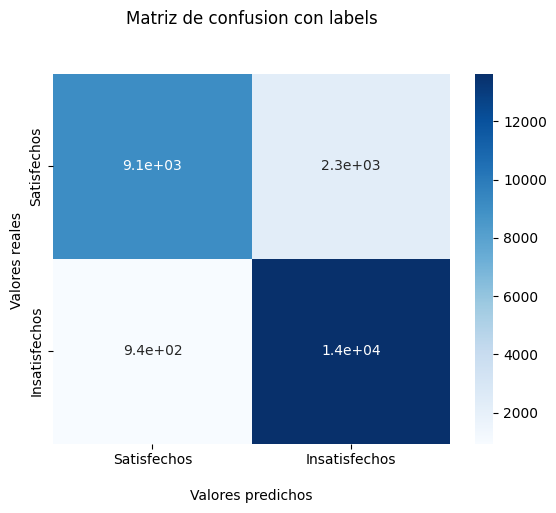

In [ ]:
ax = sns.heatmap(confusion, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['Satisfechos','Insatisfechos'])
ax.yaxis.set_ticklabels(['Satisfechos','Insatisfechos'])
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(Y_EndTest, Predicciones_EndTest))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     11403
           1       0.86      0.94      0.89     14573

    accuracy                           0.87     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.87      0.87     25976



La métrica obtenida indica un acierto del **93.55%** con el nuevo dataset, por lo que pareciera que el modelo es adecuado para el problema.

### Conclusión
El modelo elaborado permite predecir si un cliente de la aerolínea estará satisfecho o no según cómo haya sido su experiencia en el vuelo.

El modelo presenta una *exactitud* del **87.49%**, con 22727 aciertos y 3249 fallos. Sin embargo, la selección de variables fue hecha pensando en una alta *sensibilidad* respecto a la insatisfacción de los usuarios, y es en ésta donde se obtiene un **93.55%**.

Por lo tanto el modelo permite anticipar de buena manera el grado de satisfacción de los pasajeros en función de los valores proporcionados en la encuesta de satisfacción


## Práctica de Reglas de Asociación:

1- Convertir todo el dataset a listas

2- Aplicar el algoritmo

In [ ]:
#Creación de lista para reglas de asociación
lista=[]
for i in range(0,1039): #No tomo el dataset completo porque no lo termina
  lista.append([str(df_AerolineasSatisfaccion.values[i,j]) for j in range(1,24)]) #Hay muchas columnas que se deberían quitar porque sus outputs no son interpretables

print(lista)

In [ ]:
#Algoritmo
#Antes de ejecutar habría que cambiar las edades por rangos etáreos para que la información se concentre mejor y sea más fácil de interpretar
reglas=apriori(lista, min_support=0.1, min_confidence=0.1,min_lift=3, min_length=2)
reglas=list(reglas)
print(len(reglas))

17


In [ ]:
for item in reglas:
  pair=item[0]
  items=[x for x in pair]

  print("Regla: " + items[0] + " -> " + items[1])

  #second index of the inner list
  print("Soporte: " + str(item[1]))

  #third index of the list located at 0th
  #of the third index of the inner list

  print("Confianza: " + str(item[2][0][2]))
  print("Alza: " + str(item[2][0][3]))
  print("=====================================")


Regla: Personal Travel -> 3
Soporte: 0.10298363811357074
Confianza: 0.6149425287356322
Alza: 3.0137985252656687
Regla: Personal Travel -> Loyal Customer
Soporte: 0.1068334937439846
Confianza: 0.6379310344827586
Alza: 3.5827586206896544
Regla: Personal Travel -> Loyal Customer
Soporte: 0.11838306063522618
Confianza: 0.7068965517241379
Alza: 3.416118684843625
Regla: 2 -> Personal Travel
Soporte: 0.1039461020211742
Confianza: 0.6206896551724138
Alza: 3.412151067323481
Regla: Personal Travel -> 3
Soporte: 0.10202117420596728
Confianza: 0.6091954022988506
Alza: 3.723258958755916
Regla: Personal Travel -> 3
Soporte: 0.11164581328200192
Confianza: 0.6666666666666666
Alza: 3.395424836601307
Regla: Personal Travel -> Loyal Customer
Soporte: 0.1068334937439846
Confianza: 0.6379310344827586
Alza: 3.3816854327938066
Regla: Personal Travel -> Loyal Customer
Soporte: 0.10105871029836382
Confianza: 0.603448275862069
Alza: 3.0885850178359093
Regla: 2 -> Personal Travel
Soporte: 0.10202117420596728
Con

## API

In [ ]:
import requests

url = "https://api.gemini.com/v2/ticker/btcusd"

response = requests.get(url)
data=json.loads(response.text)
df_BTCUSD=pd.DataFrame(data)

print(response.status_code)

200


In [ ]:
data

{'symbol': 'BTCUSD',
 'open': '29412.51',
 'high': '29537.36',
 'low': '29208.7',
 'close': '29457.34',
 'changes': ['29412.51',
  '29382',
  '29392.86',
  '29363.54',
  '29340.81',
  '29313.04',
  '29330.73',
  '29362.47',
  '29467.35',
  '29434.05',
  '29394.29',
  '29409.87',
  '29362.42',
  '29350',
  '29374.99',
  '29374.89',
  '29426.98',
  '29419.41',
  '29382.2',
  '29374.15',
  '29537.36',
  '29537.36',
  '29457.34',
  '29429.13'],
 'bid': '29410.54',
 'ask': '29411.17'}

In [ ]:
df_BTCUSD

,symbol,open,high,low,close,changes,bid,ask
0,BTCUSD,29405.78,29537.36,29208.7,29537.36,29405.78,29397.1,29399.21
1,BTCUSD,29405.78,29537.36,29208.7,29537.36,29412.51,29397.1,29399.21
2,BTCUSD,29405.78,29537.36,29208.7,29537.36,29382,29397.1,29399.21
3,BTCUSD,29405.78,29537.36,29208.7,29537.36,29392.86,29397.1,29399.21
4,BTCUSD,29405.78,29537.36,29208.7,29537.36,29363.54,29397.1,29399.21
5,BTCUSD,29405.78,29537.36,29208.7,29537.36,29340.81,29397.1,29399.21
6,BTCUSD,29405.78,29537.36,29208.7,29537.36,29313.04,29397.1,29399.21
7,BTCUSD,29405.78,29537.36,29208.7,29537.36,29330.73,29397.1,29399.21
8,BTCUSD,29405.78,29537.36,29208.7,29537.36,29362.47,29397.1,29399.21
9,BTCUSD,29405.78,29537.36,29208.7,29537.36,29467.35,29397.1,29399.21


In [ ]:
df_BTCUSD.dtypes

symbol     object
open       object
high       object
low        object
close      object
changes    object
bid        object
ask        object
dtype: object

In [ ]:
df_BTCUSD.shape

(24, 8)

In [ ]:
df_BTCUSD['symbol']=df_BTCUSD['symbol'].astype('string')

In [ ]:
columnas=list(df_BTCUSD.columns)
columnas.pop(0)
for i in columnas:
  df_BTCUSD[i]=df_BTCUSD[i].astype('float')

In [ ]:
df_BTCUSD.dtypes

symbol        object
open         float64
high         float64
low          float64
close        float64
changes      float64
bid          float64
ask          float64
variacion    float64
dtype: object

In [ ]:
df_BTCUSD['variacion_changes'] = df_BTCUSD['changes'] - df_BTCUSD['changes'].shift(1)

df_BTCUSD['future_change']=df_BTCUSD['variacion_changes'].shift(-1)
df_BTCUSD['variacion_acc']=df_BTCUSD['variacion_changes']-df_BTCUSD['variacion_changes'].shift(1)
df_BTCUSD=df_BTCUSD.fillna(0)
df_BTCUSD

,symbol,open,high,low,close,changes,bid,ask,variacion_changes,future_change,variacion_acc
0,BTCUSD,29405.78,29537.36,29208.7,29537.36,29405.78,29397.1,29399.21,0.00,6.73,0.00
1,BTCUSD,29405.78,29537.36,29208.7,29537.36,29412.51,29397.1,29399.21,6.73,-30.51,0.00
2,BTCUSD,29405.78,29537.36,29208.7,29537.36,29382.00,29397.1,29399.21,-30.51,10.86,-37.24
3,BTCUSD,29405.78,29537.36,29208.7,29537.36,29392.86,29397.1,29399.21,10.86,-29.32,41.37
4,BTCUSD,29405.78,29537.36,29208.7,29537.36,29363.54,29397.1,29399.21,-29.32,-22.73,-40.18
5,BTCUSD,29405.78,29537.36,29208.7,29537.36,29340.81,29397.1,29399.21,-22.73,-27.77,6.59
6,BTCUSD,29405.78,29537.36,29208.7,29537.36,29313.04,29397.1,29399.21,-27.77,17.69,-5.04
7,BTCUSD,29405.78,29537.36,29208.7,29537.36,29330.73,29397.1,29399.21,17.69,31.74,45.46
8,BTCUSD,29405.78,29537.36,29208.7,29537.36,29362.47,29397.1,29399.21,31.74,104.88,14.05
9,BTCUSD,29405.78,29537.36,29208.7,29537.36,29467.35,29397.1,29399.21,104.88,-33.30,73.14


In [ ]:
print(df_BTCUSD['open'].value_counts())
print(df_BTCUSD['high'].value_counts())
print(df_BTCUSD['low'].value_counts())
print(df_BTCUSD['close'].value_counts())
print(df_BTCUSD['bid'].value_counts())
print(df_BTCUSD['ask'].value_counts())

29405.78    24
Name: open, dtype: int64
29537.36    24
Name: high, dtype: int64
29208.7    24
Name: low, dtype: int64
29537.36    24
Name: close, dtype: int64
29397.1    24
Name: bid, dtype: int64
29399.21    24
Name: ask, dtype: int64


Como las únicas columnas que no repiten sus valores son *'change'* y las columnas agregadas, se dropearan todas las demás.

In [ ]:
df_BTCUSD=df_BTCUSD.drop(['symbol','open','high','low','close','bid','ask'], axis=1)

In [ ]:
df_BTCUSD = df_BTCUSD.rename(columns={'changes': 'BTCUSD_changes', 'variacion_changes':'BTCUSD_chg_rate', 'future_change':'BTCUSD_exp_chg_rate',	'variacion_acc':'BTCUSD_chg_acc'})
df_BTCUSD

,BTCUSD_changes,BTCUSD_chg_rate,BTCUSD_exp_chg_rate,BTCUSD_chg_acc
0,29405.78,0.00,6.73,0.00
1,29412.51,6.73,-30.51,0.00
2,29382.00,-30.51,10.86,-37.24
3,29392.86,10.86,-29.32,41.37
4,29363.54,-29.32,-22.73,-40.18
5,29340.81,-22.73,-27.77,6.59
6,29313.04,-27.77,17.69,-5.04
7,29330.73,17.69,31.74,45.46
8,29362.47,31.74,104.88,14.05
9,29467.35,104.88,-33.30,73.14


Un posible modelo de ML que se puede trabajar es uno de regresión que prediga el valor de la varialbe *'BTCUSD_exp_chg_rate'* a partir de los valores de todas las demás variables que se han dejado en el Data Frame. Esto sería de gran utilidad porque el saber el valor futuro del **cambio** en el precio permite decidir si conviene comprar o vender la moneda.

In [ ]:
df_BTCUSD.describe()

,BTCUSD_changes,BTCUSD_chg_rate,BTCUSD_exp_chg_rate,BTCUSD_chg_acc
count,24.000000,24.000000,24.000000,24.000000
mean,29400.266667,2.148333,2.148333,-3.614583
std,56.442239,50.508074,50.508074,69.748293
min,29313.040000,-80.020000,-80.020000,-163.210000
25%,29363.272500,-29.617500,-29.617500,-37.975000
50%,29387.530000,-3.835000,-3.835000,0.000000
75%,29421.302500,16.107500,16.107500,38.400000
max,29537.360000,163.210000,163.210000,171.260000


In [ ]:
import requests
url= "https://api.coincap.io/v2/assets"

response = requests.get(url)
data=json.loads(response.text)
print(response.status_code)

200


In [ ]:
data

{'data': [{'id': 'bitcoin',
   'rank': '1',
   'symbol': 'BTC',
   'name': 'Bitcoin',
   'supply': '19454537.0000000000000000',
   'maxSupply': '21000000.0000000000000000',
   'marketCapUsd': '572564311684.8796124875209037',
   'volumeUsd24Hr': '2596097774.0538134109300054',
   'priceUsd': '29430.8886243285878501',
   'changePercent24Hr': '-0.0888971609293840',
   'vwap24Hr': '29420.0083419189684983',
   'explorer': 'https://blockchain.info/'},
  {'id': 'ethereum',
   'rank': '2',
   'symbol': 'ETH',
   'name': 'Ethereum',
   'supply': '120149688.3865989000000000',
   'maxSupply': None,
   'marketCapUsd': '222461877979.6478303998535434',
   'volumeUsd24Hr': '1321344280.5932413293795552',
   'priceUsd': '1851.5393669923200118',
   'changePercent24Hr': '-0.1125705307372631',
   'vwap24Hr': '1847.7561031132853844',
   'explorer': 'https://etherscan.io/'},
  {'id': 'tether',
   'rank': '3',
   'symbol': 'USDT',
   'name': 'Tether',
   'supply': '83410866925.6134800000000000',
   'maxSupply

In [ ]:

df_Symbols=pd.DataFrame(data)
df_Symbols

,data,timestamp
0,"{'id': 'bitcoin', 'rank': '1', 'symbol': 'BTC'...",1691802686357
1,"{'id': 'ethereum', 'rank': '2', 'symbol': 'ETH...",1691802686357
2,"{'id': 'tether', 'rank': '3', 'symbol': 'USDT'...",1691802686357
3,"{'id': 'binance-coin', 'rank': '4', 'symbol': ...",1691802686357
4,"{'id': 'xrp', 'rank': '5', 'symbol': 'XRP', 'n...",1691802686357
...,...,...
95,"{'id': 'celo', 'rank': '96', 'symbol': 'CELO',...",1691802686357
96,"{'id': 'singularitynet', 'rank': '97', 'symbol...",1691802686357
97,"{'id': 'theta-fuel', 'rank': '98', 'symbol': '...",1691802686357
98,"{'id': 'ankr', 'rank': '99', 'symbol': 'ANKR',...",1691802686357


In [ ]:
df_Symbols['timestamp'].value_counts()
#Checkeo que la columna timestamp sólo tiene un valor, por lo que puede ser desechada.

1691802686357    100
Name: timestamp, dtype: int64

In [ ]:
df_Symbols=pd.json_normalize(df_Symbols['data'])
df_Symbols

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
0,bitcoin,1,BTC,Bitcoin,19454537.0000000000000000,21000000.0000000000000000,572564311684.8796124875209037,2596097774.0538134109300054,29430.8886243285878501,-0.0888971609293840,29420.0083419189684983,https://blockchain.info/
1,ethereum,2,ETH,Ethereum,120149688.3865989000000000,None,222461877979.6478303998535434,1321344280.5932413293795552,1851.5393669923200118,-0.1125705307372631,1847.7561031132853844,https://etherscan.io/
2,tether,3,USDT,Tether,83410866925.6134800000000000,None,83386960388.1998403107880241,6057505109.7269002605965703,0.9997133882155312,0.0189370089801566,0.9987155721547716,https://www.omniexplorer.info/asset/31
3,binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,40047620598.0954926621550016,129087656.9409335572020795,240.0919962379125392,-0.7503104277226171,239.9208572702177166,https://etherscan.io/token/0xB8c77482e45F1F44d...
4,xrp,5,XRP,XRP,45404028640.0000000000000000,100000000000.0000000000000000,28680878976.9731614986257280,414130951.3335106854534097,0.6316813691661252,-0.5956418581990532,0.6321903628393504,https://xrpcharts.ripple.com/#/graph/
...,...,...,...,...,...,...,...,...,...,...,...,...
95,celo,96,CELO,Celo,508448178.0000000000000000,1000000000.0000000000000000,264354581.7924328094223852,2082381.2478488230561048,0.5199243368956134,1.6158119678745985,0.5146462890070733,https://explorer.celo.org/blocks
96,singularitynet,97,AGIX,SingularityNET,1227214305.8849297000000000,2000000000.0000000000000000,256732875.8358002490858582,748322.4569884184536602,0.2091997091336653,-0.6264349781023897,0.2112902890161977,https://etherscan.io/token/0x8eb24319393716668...
97,theta-fuel,98,TFUEL,Theta Fuel,6241233711.0000000000000000,None,249129561.3846772231576761,232438.0355222775200864,0.0399167172582551,-0.3862560033149426,0.0397684131433806,https://explorer.thetatoken.org/
98,ankr,99,ANKR,Ankr,10000000000.0000000000000000,10000000000.0000000000000000,242046434.4830340000000000,2742500.3695272180295955,0.0242046434483034,-0.4648037311648057,0.0241455164170104,https://etherscan.io/token/0x8290333ceF9e6D528...


In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  display(df_Symbols.isna().sum())

id                    0
rank                  0
symbol                0
name                  0
supply                0
maxSupply            38
marketCapUsd          0
volumeUsd24Hr         0
priceUsd              0
changePercent24Hr     0
vwap24Hr              1
explorer              2
dtype: int64

In [ ]:
df_Symbols.loc[df_Symbols['maxSupply'].isna()]

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
1,ethereum,2,ETH,Ethereum,120149688.3865989000000000,None,222461877979.6478303998535434,1321344280.5932413293795552,1851.5393669923200118,-0.1125705307372631,1847.7561031132853844,https://etherscan.io/
2,tether,3,USDT,Tether,83410866925.6134800000000000,None,83386960388.1998403107880241,6057505109.7269002605965703,0.9997133882155312,0.0189370089801566,0.9987155721547716,https://www.omniexplorer.info/asset/31
5,usd-coin,6,USDC,USD Coin,26108526023.7489360000000000,None,26123097983.0684065432655372,435028702.2139486287215994,1.0005581302945335,-0.0194673888158323,1.0004382520078142,https://etherscan.io/token/0xa0b86991c6218b36c...
6,dogecoin,7,DOGE,Dogecoin,140552536383.7052300000000000,None,10689291125.3968639098185625,102227458.7054044158276803,0.0760519262079721,0.1720362916533994,0.0755316700647197,http://dogechain.info/chain/Dogecoin
8,solana,9,SOL,Solana,405980865.7753470000000000,None,10014632429.5866471862843681,82433362.9886285213001261,24.6677448959585452,-0.5542919725288672,24.5965637127413155,https://explorer.solana.com/
9,tron,10,TRX,TRON,89496457279.7453300000000000,None,6939992657.3623520292493941,62476085.2547114253249417,0.0775448868961319,0.2690233177894868,0.0772122554331815,https://tronscan.org/#/
10,shiba-inu,11,SHIB,Shiba Inu,589346914631298.1000000000000000,None,6397222267.7502063582226108,241627602.5325037026757996,0.0000108547650101,10.6593655833993847,0.0000103388173232,https://etherscan.io/token/0x95ad61b0a150d7921...
12,polkadot,13,DOT,Polkadot,1263249238.7745100000000000,None,6329890305.4113478279167187,28597662.1787728699695890,5.0108008072516506,0.0103007069189553,4.9943298023360896,https://polkascan.io/polkadot
14,multi-collateral-dai,15,DAI,Multi Collateral DAI,5269191732.1166990000000000,None,5274065816.4410761932889556,12086804.5136550017943890,1.0009250155568773,-0.0241375297193340,1.0004280677743433,https://etherscan.io/token/0x89d24a6b4ccb1b6fa...
15,wrapped-bitcoin,16,WBTC,Wrapped Bitcoin,162305.3176853100000000,None,4781950445.8144653642968325,39543835.9419020927758002,29462.6849816841965781,-0.0602630987545085,29418.4784425597170238,https://etherscan.io/token/0x2260fac5e5542a773...


In [ ]:
df_Symbols.loc[df_Symbols['vwap24Hr'].isna()]

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
65,paxos-standard,66,USDP,Pax Dollar,506100005.2006834000000000,None,506763999.2918443454282582,962677.1175255375552464,1.0013119819884168,0.0181393801172848,None,https://etherscan.io/token/0x8e870d67f660d95d5...


##Story Telling

*   La clase en la que vuelan los pasajeros es un factor de alta influencia en la calificación final de los usuarios.
*   La distancia a volar lleva a la elección de la clase del vuelo y, por lo tanto, impacta en la valoración del vuelo. (A menor distancia, se elige una clase más económica, por ende hay menor satisfacción).
*   La edad de los pasajeros influye en la elección de la clase del vuelo y termina afectando la satisfacción final. (A menor edad se eligen clases más económicas, por lo tanto mayor insatisfacción).
*   Las valoraciones promedio de los pasajeros satisfechos son mayores que las valoraciones promedio de aquellos que no han quedado satisfechos.
*   Las demoras en los tiempos de partida y llegada son un factor fundamental en la insatisfacción de los usuarios.


###¿Es la clase realmente importante?

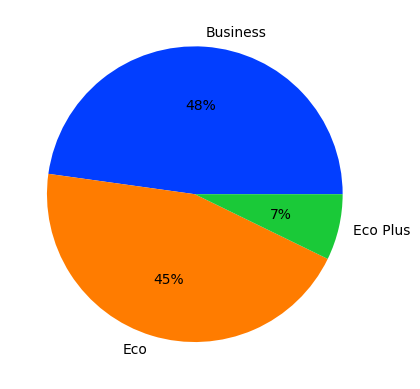

In [ ]:
df_clase=df_AerolineasSatisfaccion.groupby('Class')['id'].count()

palette_color = sns.color_palette('bright')
plt.pie(df_clase, labels=df_clase.index, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

**Eco vs Business**

Text(0.5, 1.0, 'Relación Clase - Satisfacción')

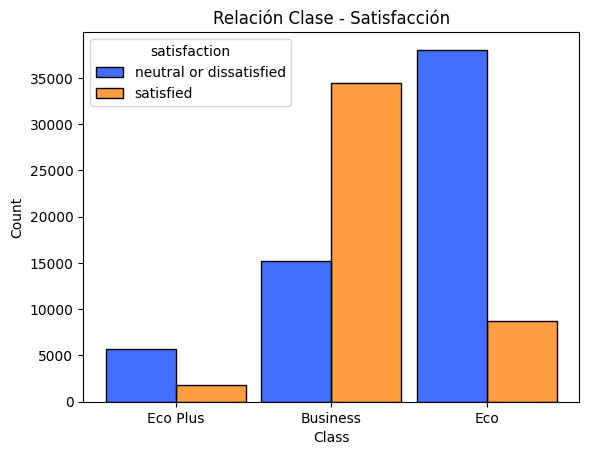

In [ ]:
sns.histplot(x=df_AerolineasSatisfaccion['Class'], hue=df_AerolineasSatisfaccion['satisfaction'], multiple='dodge', shrink=.9, palette='bright').set_title("Relación Clase - Satisfacción")

Luego de la inspección de los datos, salta a la vista que el grueso de los clientes está distribuido entre las clases *Business* y *Eco*. Los resultados en las encuestas de ambas clases son diametralmente opuestas: la gran mayoría de los viajeros *Business* se muestran satisfechos, mientras la mayoría de los viajeros *Eco* se encuentran insatisfechos.

**¿Qué decisión tomar?**

La alta satisfacción en la clase *Business* da la seguridad que los servicios ofrecidos en ésta son apropiados para los viajeros, por lo que no se ve la necesidad de hacer cambios.

Los resultados visualizados en la clase *Eco*, en cambio, hablan de manera muy diferente. Que la categoría de "Viajeros *Eco* insatisfechos" sea la más numerosa es una llamada de atención muy imporante que no puede ser ignorada. Ante esta situación, dos ideas son presentadas: mejorar los servicios presetados en la clase *Eco* u ofrecer promociones que faciliten a los usuarios una mejora en su categoría.

Una migración de ciertos usuarios a la clase *Business* podría lograr una mejor satisfacción al mismo tiempo que una ganancia para la empresa al cobrar una tarifa promocional más alta a aquellos pasajeros que anteriormente eran *Eco*, aunque más accesible que una tarifa clásica de *Business*.



In [ ]:
df_Eco=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['Class']=='Eco']
df_Eco

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Mean Satisfaction,satisfaction
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,3,4,4,4,4,1,0,0.0,2.500000,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,3,3,4,3,5,2,9,23.0,2.785714,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,3,4,4,3,2,0,0.0,2.928571,neutral or dissatisfied
10,34991,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,...,3,3,5,3,5,2,0,0.0,3.571429,neutral or dissatisfied
12,98628,Male,Loyal Customer,53,Business travel,Eco,834,1,4,4,...,1,1,3,4,4,1,28,8.0,2.214286,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,1,...,3,3,5,5,4,1,13,10.0,2.142857,neutral or dissatisfied
103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,...,3,4,3,1,3,4,0,0.0,3.785714,neutral or dissatisfied
103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,...,4,3,4,2,4,2,0,0.0,2.785714,neutral or dissatisfied
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,1,4,2,3,2,3,0.0,2.214286,neutral or dissatisfied


Text(0.5, 0.98, 'Diferencia: Satisfechos - Eco')

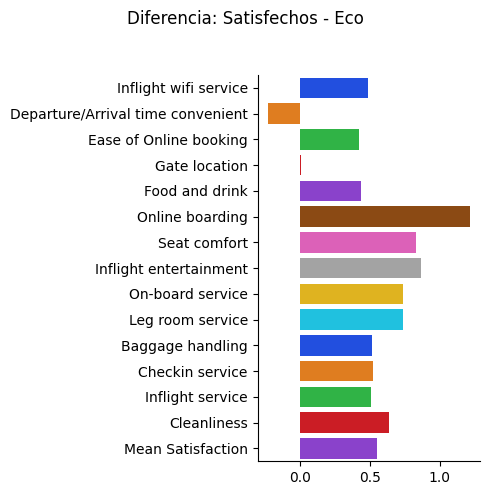

In [ ]:
#Tabla de Eco
df_Eco=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['Class']=='Eco']
df_numericas=pd.concat([df_Eco.select_dtypes(['int64','float']),df_Eco['Class']],axis=1)

df_columnas_valoraciones=df_numericas.drop(['id','Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

df_columnas_valoraciones_promedio=df_columnas_valoraciones.groupby('Class').mean().reset_index()
df_columnas_valoraciones_promedio=df_columnas_valoraciones_promedio.drop('Class', axis=1)


#Tabla de Satisfechos
df_numericas_s=pd.concat([df_AerolineasSatisfaccion.select_dtypes(['int64','float']),df_AerolineasSatisfaccion['satisfaction']],axis=1)

df_columnas_valoraciones_s=df_numericas_s.drop(['id','Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

df_columnas_valoraciones_promedio_s=df_columnas_valoraciones_s.groupby('satisfaction').mean().reset_index()
df_columnas_valoraciones_promedio_satisfechos=df_columnas_valoraciones_promedio_s.loc[df_columnas_valoraciones_promedio_s['satisfaction']=='satisfied']
df_columnas_valoraciones_promedio_satisfechos=df_columnas_valoraciones_promedio_satisfechos.drop('satisfaction', axis=1)

#Pego las tablas
df_valoraciones=pd.concat([df_columnas_valoraciones_promedio,df_columnas_valoraciones_promedio_satisfechos])
#df_valoraciones['Tipo de Cliente']=['Clientes Eco', 'Clientes Satisfechos']

df_resta=df_valoraciones.iloc[1]-df_valoraciones.iloc[0]
df_resta=df_resta.to_frame().T
df_resta

fig_meansat=sns.catplot(data=df_resta, kind='bar', orient='h', palette='bright')
fig_meansat.fig.subplots_adjust(top=0.85)
fig_meansat.fig.suptitle("Diferencia: Satisfechos - Eco")

Text(0.5, 0.98, 'Diferencia: Business - Eco')

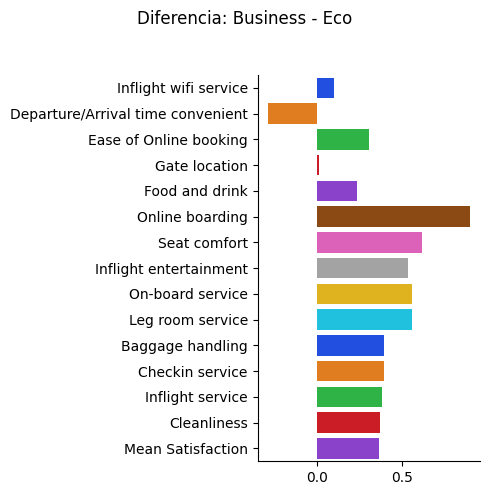

In [ ]:
df_Bus=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['Class']=='Business']
df_Eco=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['Class']=='Eco']
df_Bus

#Tabla de Eco
df_numericas=pd.concat([df_Eco.select_dtypes(['int64','float']),df_Eco['Class']],axis=1)

df_columnas_valoraciones=df_numericas.drop(['id','Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

df_columnas_valoraciones_promedio=df_columnas_valoraciones.groupby('Class').mean().reset_index()
df_columnas_valoraciones_promedio=df_columnas_valoraciones_promedio.drop('Class', axis=1)


#Tabla de Satisfechos
df_numericas_s=pd.concat([df_AerolineasSatisfaccion.select_dtypes(['int64','float']),df_AerolineasSatisfaccion['Class']],axis=1)

df_columnas_valoraciones_s=df_numericas_s.drop(['id','Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

df_columnas_valoraciones_promedio_s=df_columnas_valoraciones_s.groupby('Class').mean().reset_index()
df_columnas_valoraciones_promedio_satisfechos=df_columnas_valoraciones_promedio_s.loc[df_columnas_valoraciones_promedio_s['Class']=='Business']
df_columnas_valoraciones_promedio_satisfechos=df_columnas_valoraciones_promedio_satisfechos.drop('Class', axis=1)

#Pego las tablas
df_valoraciones=pd.concat([df_columnas_valoraciones_promedio,df_columnas_valoraciones_promedio_satisfechos])
#df_valoraciones['Tipo de Cliente']=['Clientes Eco', 'Clientes Satisfechos']

df_resta=df_valoraciones.iloc[1]-df_valoraciones.iloc[0]
df_resta=df_resta.to_frame().T
df_resta

fig_meansat=sns.catplot(data=df_resta, kind='bar', orient='h', palette='bright')
fig_meansat.fig.subplots_adjust(top=0.85)
fig_meansat.fig.suptitle("Diferencia: Business - Eco")

En los gráficos anteriores se puede observar la diferencia que hay entre la satisfacción promedio en cada aspecto del vuelo entre los usuarios que se han mostrado satisfechos o los usuarios *Business* y los usuarios de la clase *Eco*. Como era de esperarse, los usuarios *Eco* se han mostrado menos satisfechos en la gran mayoría de los aspectos.

**¿Qué aspecto mejorar?**
El item con la diferencia más marcada es el de *Online Boarding*, por lo que la empresa podría revisar el diseño de su página web, especialmente sus secciones dedicadas a los usuarios de clase *Eco*.

In [ ]:
df_edades_eco=df_Eco.groupby('Age')['id'].count()
df_edades_eco


Age
7     442
8     464
9     497
10    516
11    498
     ... 
77     23
78     12
79     13
80     20
85      2
Name: id, Length: 75, dtype: int64

<ipython-input-23-d8bbcff34aa5>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df_Eco['Age'],multiple='dodge', shrink=.9, palette='bright', stat='percent').set_title("Edades en Clase Económica (%)")


Text(0.5, 1.0, 'Edades en Clase Económica (%)')

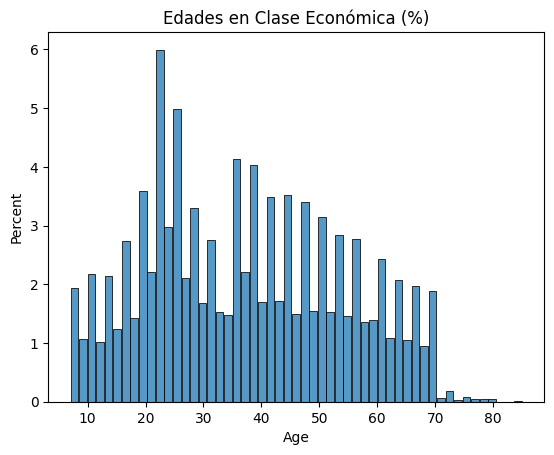

In [ ]:
sns.histplot(x=df_Eco['Age'],multiple='dodge', shrink=.9, palette='bright', stat='percent').set_title("Edades en Clase Económica (%)")

<ipython-input-28-c6454cad1175>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df_Bus['Age'],multiple='dodge', shrink=.9, palette='bright', stat='percent').set_title("Edades en Clase Business (%)")


Text(0.5, 1.0, 'Edades en Clase Business (%)')

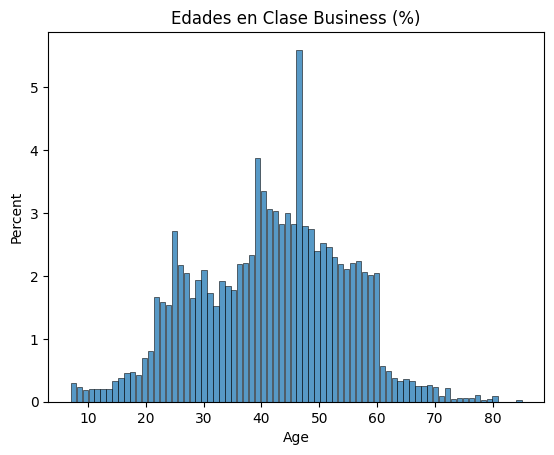

In [ ]:

sns.histplot(x=df_Bus['Age'],multiple='dodge', shrink=.9, palette='bright', stat='percent').set_title("Edades en Clase Business (%)")

Tras comparar las edades de los pasajeros en las clases *Eco* y *Business* se puede apreciar que hay una tendencia a viajar en mejor clase a medida que se aumenta en edad. Una **promoción familiar** (para usuarios que viajen con sus hijos) o para **jóvenes adolescentes** podría incentivar un *upgrade* en la categoría de vuelo de los usuarios. Esto se traduciría en una mejor experiencia para los usuarios, al mismo tiempo que un mayor ingreso para la empresa.

###¿Cómo afecta la distancia del vuelo a los pasajeros?

Al viajar en un espacio limitado, como en un avión, teniendo que estar mucho tiempo sentada, una persona puede sentirse incomoda luego de un rato. Es por eso que es de suponerse que la **distancia** se vuelva un factor importante en la satisfacción de los usuarios.

<ipython-input-42-be478eb663d8>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_satisfechos, x='Flight Distance', stat='count', palette='bright').set_title("Relación Distancia - Satisfacción")


Text(0.5, 1.0, 'Relación Distancia - Satisfacción')

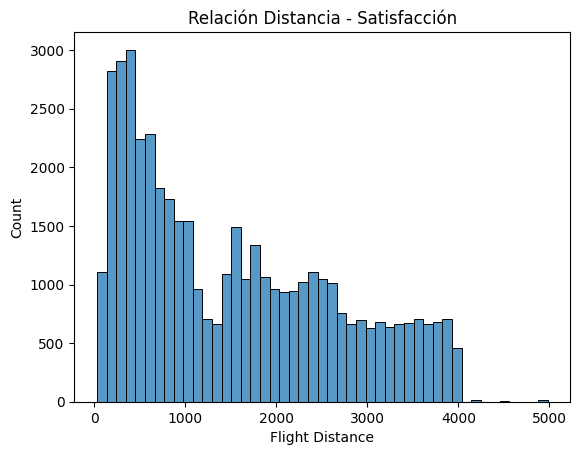

In [ ]:
df_satisfechos=df_AerolineasSatisfaccion.loc[df_AerolineasSatisfaccion['satisfaction']=='satisfied']
sns.histplot(data=df_satisfechos, x='Flight Distance', stat='count', palette='bright').set_title("Relación Distancia - Satisfacción")

Se puede ver que la satisfacción de los usuarios baja en los vuelos de largas distancias. La empresa deberá revisar las **comodidades ofrecidas en aviones de larga distancia** para poder brindar un mejor servicio a sus clientes y así mejorar los resultados de las encuestas.

Text(0.5, 1.0, 'Relación Distancia - Satisfacción')

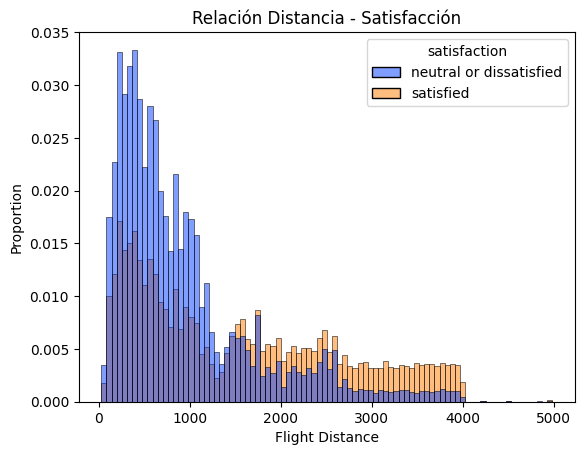

In [ ]:
sns.histplot(data=df_AerolineasSatisfaccion, x='Flight Distance', stat='proportion', hue='satisfaction', palette='bright').set_title("Relación Distancia - Satisfacción")

Sin embargo, resulta muy curioso que, en los vuelos de mayores distancia sea mayor el porcentaje de personas satisfechas que de personas insatisfechas.

**¿Qué eligen las personas que hacen vuelos de larga distancia?**

En el siguiente gráfico se puede apreciar que la mayoría de los usuarios que hacen viajes de larga distancia se deciden por tomar vuelos en clase *Business*. Esta pareciese ser la explicación para la curiosa situación mencionada arriba: *la mayor parte de los viajeros de larga distancia se encuentran satisfechos*.

Es decir que al viajar mayores distancias, la gente elige una mejor categoría de vuelo, lo que lleva a una mayor satisfacción.

Text(0.5, 1.0, 'Relación Clase - Distancia - Satisfacción')

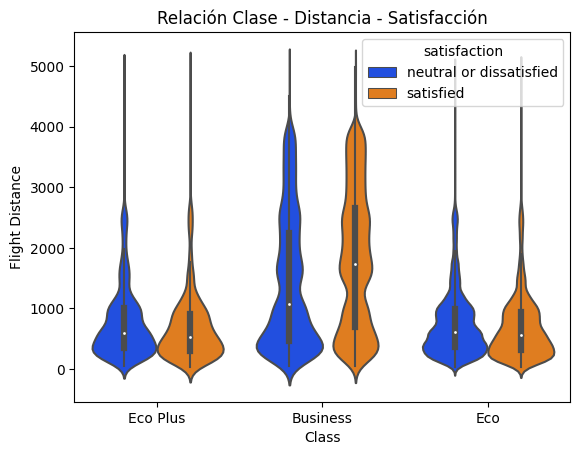

In [ ]:
sns.violinplot(x = df_AerolineasSatisfaccion['Class'], y=df_AerolineasSatisfaccion['Flight Distance'], hue=df_AerolineasSatisfaccion['satisfaction'], palette='bright').set_title("Relación Clase - Distancia - Satisfacción")

A pesar de esta última curiosidad, se debe destacar que, incluso entre los usuarios *Business* la satisfacción disminuye en vuelos de larga distancia comparados con vuelos cortos. Por lo que incluso en esta clase deben revisarse los servicios prestados en los vuelos de larga distancia.

## Insights: Análisis univariado y multivariado

In [ ]:
profile=pandas_profiling.ProfileReport(df_AerolineasSatisfaccion)

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

La tabla generada con Pandas Profiling permite visualizar de forma rápida que la relación uno a uno de todas las variables contra la variable objetivo (*satisfaction*) no es tan alta: sólo cuatro variables presentan una correlación mayor a 0.5. Por otro lado, hay una fuerte correlación entre la variable *mean satisfaction* y las variables de puntajes, puesto que la satisfacción promedio depende de manera directa de los puntajes por su regla de cálculo.
Las visualizaciones de la sección **Abordaje y Conclusiones sobre las Hipótesis** permiten establecer las siguientes relaciones:


*   La clase en la que se vuela afecta la satisfacción de los clientes. A mejor clase, mayor satisfacción.
*   La distancia del vuelo afecta la satisfacción de los clientes. A mayor distancia, resulta haber un mayor porcentaje de clientes satisfechos. Esto lleva a pensar que a mayor distancia, se escoje una mejor clase y, por lo tanto, el cliente resulta más satisfecho (como efectivamente se puede observar en los gráficos de barras en aquella sección)
*   La edad de los pasajeros está relacionada con la clase que eligen. La gente de menor edad viaja, en su mayoría, en clases económicas, mientras que los viajeros de mayor edad acceden a más vuelos en clase *Business*. Es de suponer que esto se deba al nivel adquisitivo de las personas de mayor edad (presumiblemente con mayor experiencia laboral y, por ende, mejores puestos laborales con mejores remuneraciones) contra el de los jóvenes (presumiblemente niños o jóvenes aún en edad estudiantil con poca experiencia laboral).
*   Los índices de satisfacción, en especial el de satisfacción promedio calculada, influyen en la satisfacción final del usuario. El heatmap realizado con *Pandas Profiling* destaca que *Online Boarding* es el aspecto más relevante para los usuarios.



In [ ]:
df=pd.DataFrame({'Cantidad':df_AerolineasSatisfaccion.groupby(['Class','satisfaction', 'Flight Distance']).size()})
df=df.reset_index()
df

,Class,satisfaction,Flight Distance,Cantidad
0,Business,neutral or dissatisfied,56,1
1,Business,neutral or dissatisfied,67,9
2,Business,neutral or dissatisfied,73,6
3,Business,neutral or dissatisfied,74,4
4,Business,neutral or dissatisfied,77,1
...,...,...,...,...
11034,Eco Plus,satisfied,2717,1
11035,Eco Plus,satisfied,2777,1
11036,Eco Plus,satisfied,2917,1
11037,Eco Plus,satisfied,4243,1


In [ ]:
df[df['satisfaction']=='neutral or dissatisfied']

,Class,satisfaction,Flight Distance,count
0,Business,neutral or dissatisfied,56,1
1,Business,neutral or dissatisfied,67,9
2,Business,neutral or dissatisfied,73,6
3,Business,neutral or dissatisfied,74,4
4,Business,neutral or dissatisfied,77,1
...,...,...,...,...
10333,Eco Plus,neutral or dissatisfied,3784,1
10334,Eco Plus,neutral or dissatisfied,3904,1
10335,Eco Plus,neutral or dissatisfied,4243,2
10336,Eco Plus,neutral or dissatisfied,4817,1


Text(0.5, 1.2, 'Clientes Satisfechos')

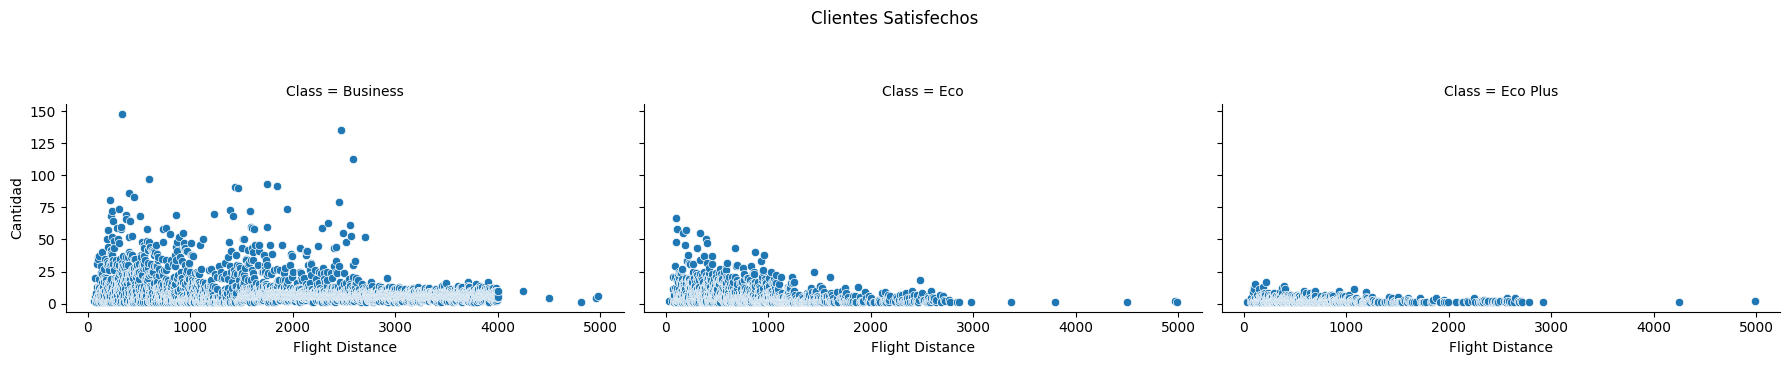

In [ ]:
chart=sns.FacetGrid(df[df['satisfaction']=='satisfied'],col='Class', margin_titles=True, col_wrap=3, aspect=2, row_order=df['Class'].unique(), legend_out='Satisfechos')
chart.map(sns.scatterplot,'Flight Distance','Cantidad')

chart.fig.suptitle('Clientes Satisfechos', y=1.2)

Text(0.5, 1.2, 'Clientes Insatisfechos')

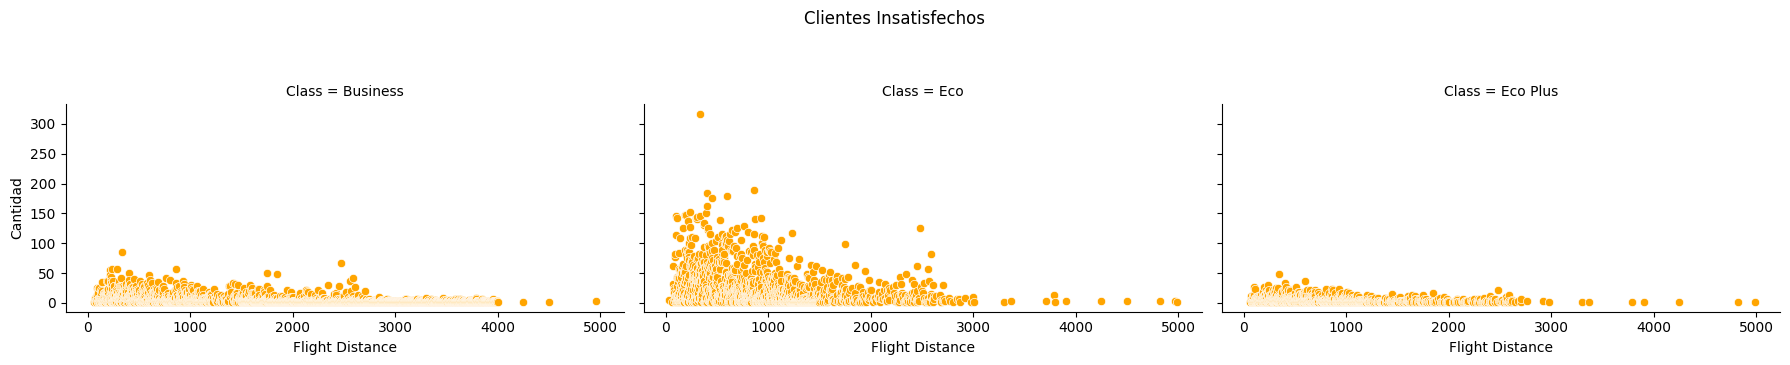

In [ ]:
chart=sns.FacetGrid(df[df['satisfaction']=='neutral or dissatisfied'],col='Class', margin_titles=True, col_wrap=3, aspect=2, row_order=df['Class'].unique())
chart.map(sns.scatterplot,'Flight Distance','Cantidad', color='orange')
chart.fig.suptitle('Clientes Insatisfechos', y=1.2)

Los gráficos anteriores muestran las diferencias entre la cantidad de pasajeros satisfechos e insatisfechos en cada clase a medida que los viajes se hacen más largos. Las diferencias entre los 6 gráficos indican que tanto la clase del vuelo como la distancia afectan la satisfacción de los usuarios.

In [ ]:
df_edad_clase_s=pd.DataFrame({'Satisfechos':df_AerolineasSatisfaccion[df_AerolineasSatisfaccion['satisfaction']=='satisfied'].groupby(['Class','Age']).size()})
df_edad_clase_s=df_edad_clase_s.reset_index()
df_edad_clase_s

,Class,Age,Satisfechos
0,Business,7,7
1,Business,8,20
2,Business,9,40
3,Business,10,32
4,Business,11,38
...,...,...,...
218,Eco Plus,76,1
219,Eco Plus,77,1
220,Eco Plus,78,4
221,Eco Plus,79,1


In [ ]:
df_edad_clase_i=pd.DataFrame({'Insatisfechos':df_AerolineasSatisfaccion[df_AerolineasSatisfaccion['satisfaction']=='neutral or dissatisfied'].groupby(['Class','Age']).size()})
df_edad_clase_i=df_edad_clase_i.reset_index()
df_edad_clase_i

,Class,Age,Insatisfechos
0,Business,7,49
1,Business,8,69
2,Business,9,76
3,Business,10,59
4,Business,11,61
...,...,...,...
220,Eco Plus,77,13
221,Eco Plus,78,2
222,Eco Plus,79,5
223,Eco Plus,80,9


Text(0.5, 1.2, 'Clientes Satisfechos')

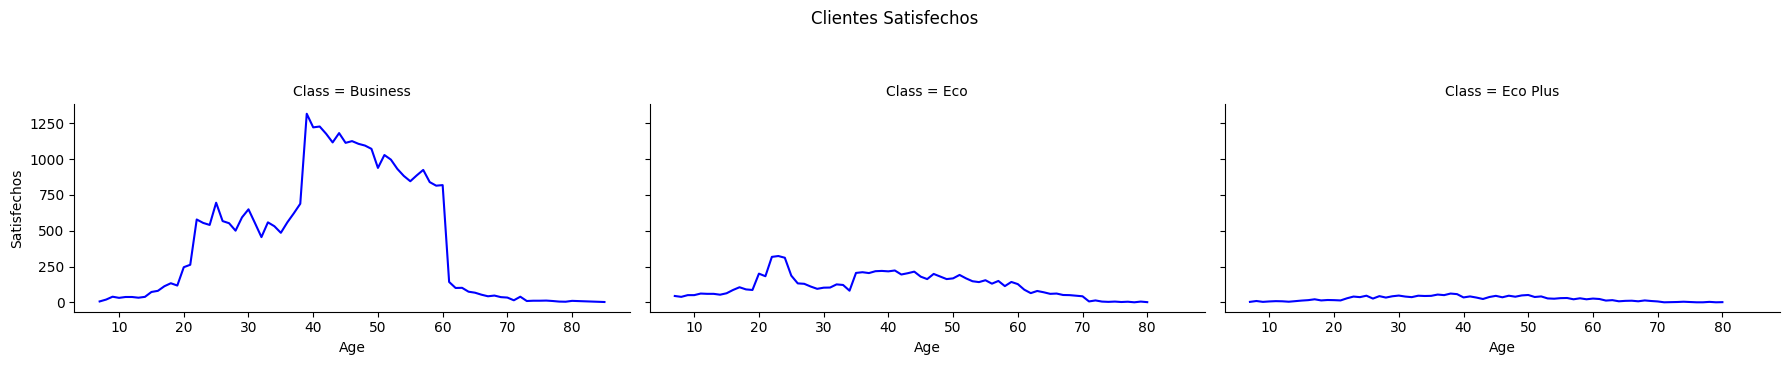

In [ ]:
chart=sns.FacetGrid(df_edad_clase_s,col='Class', margin_titles=True, col_wrap=3, aspect=2, row_order=df['Class'].unique())
chart.map(sns.lineplot,'Age','Satisfechos', color='blue')
chart.fig.suptitle('Clientes Satisfechos', y=1.2)

Text(0.5, 1.2, 'Clientes Insatisfechos')

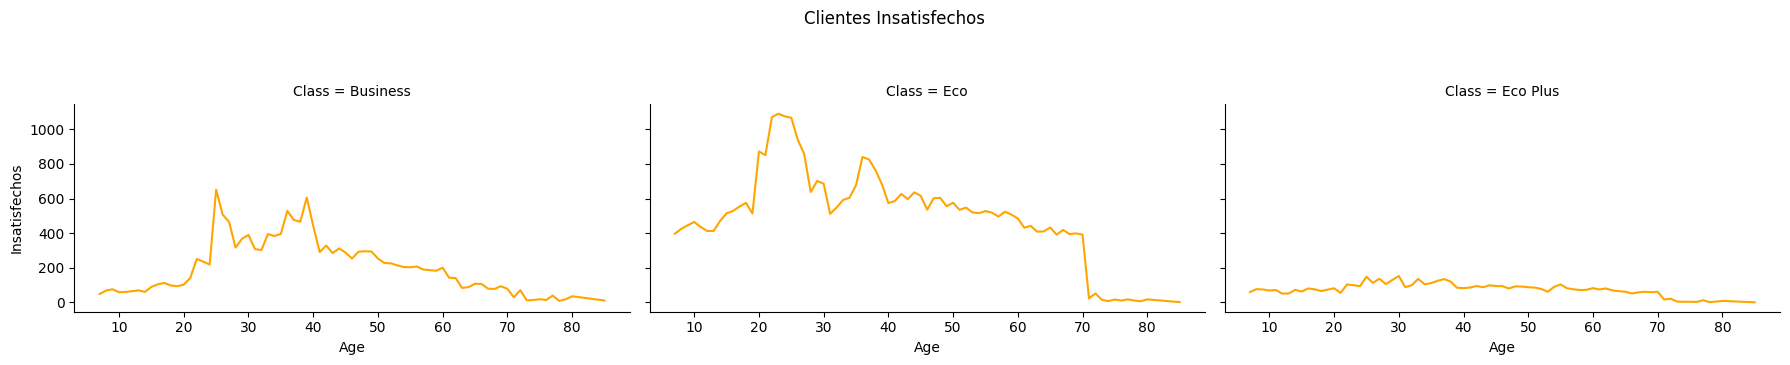

In [ ]:
chart=sns.FacetGrid(df_edad_clase_i,col='Class', margin_titles=True, col_wrap=3, aspect=2, row_order=df['Class'].unique())
chart.map(sns.lineplot,'Age','Insatisfechos', color='orange')
chart.fig.suptitle('Clientes Insatisfechos', y=1.2)

La marcada diferencia entre los gráficos anteriores indica que las edades y las clases en conjunto afectan la satisfacción de los usuarios. La clase *Eco Plus* es bastante constante en la distribución de la satisfacción dependiendo de las edades, pero las clases *Eco* y *Business* tienden a aumentar la satisfacción al aumentar la edad, teniendo picos de insatisfacción entre los 20 y 40 años. La clase *Business* tiene una muy marcada suba en la satisfacción entre los 40 y 60 años, mientras que la clase *Eco* tiene un pico aislado a los 20 años y luego una muy leve subida a los 40 años, que se mantiene estable hasta los 60.